# <center> Concevez une application au service de la santé publique- Nettoyage 

# 1. Introduction

Nous voulons créer une application nous permettant à partir du code d'un produit lambda proposer plusieurs produits de la même catégorie ayant un meilleur nutriscore

Tout d'abord avant de concevoir notre application nous avons besoin d'une base de données. Ce jeu de données nous avons récuperer sur le site https://world.openfoodfacts.org/ . Ce site web est un site référençant des millions de produit avec leur nutri score.                                                                                                                                                                                                                                                                                                                          



Ensuite nous devons nettoyer notre jeu de donnée appelé openfoodfacts. Ainsi nous devons supprimer les données inutile à notre application et compléter les données de manquantes.

## 1.1 Les librairies python utilisées dans notre programme

In [4]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from ipywidgets import interact, interactive, fixed, interact_manual,  HBox, Layout,VBox




# KNN Imputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler



<IPython.core.display.Javascript object>

In [6]:
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [7]:
print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("seaborn: {}".format(sns.__version__))

matplotlib: 3.7.1
numpy: 1.24.3
pandas: 1.5.3
seaborn: 0.12.2


<IPython.core.display.Javascript object>

## 1.2 Les fichiers des données contenus dans le dossier

Dans un premier temps, afin de nous simplifier la tâche nous allons créer une variable "path" qui sera le chemin vers le dossier contenant tous nos documents. Ainsi pour avoir le chemin d'un dossier il faudra juste entrer path+ Nom_du_fichier.
Si vous utilisez mon notebook, il ne faudra pas oublier de modifier le path avec le chemin du dossier sur votre ordinateur.

In [8]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/projet 2/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['.ipynb_checkpoints',
 'Bacar_Maimouna_presentation.pdf',
 'Bacar_Maïmouna_1_notebook_nettoyage_022023-Copy1.ipynb',
 'Bacar_Maïmouna_1_notebook_nettoyage_022023.ipynb',
 'Bacar_Maïmouna_2_notebook_exploration_022023.ipynb',
 'fr.openfoodfacts.org.products.csv',
 'openfoodfacts2.csv']

<IPython.core.display.Javascript object>

In [9]:
path + "fr.openfoodfacts.org.products.csv"  # le chemin du fichier  dans mon ordinateur

'C:/Users/maimo/Documents/projet 2/fr.openfoodfacts.org.products.csv'

<IPython.core.display.Javascript object>

# 2. Observation du data

Avant tout nettoyage nous devons observer notre jeu de données.

## 2.1 Data globale

In [10]:
openfoodfacts = pd.read_csv(path + "fr.openfoodfacts.org.products.csv", sep="\t")

<IPython.core.display.Javascript object>

In [11]:
openfoodfacts.head(3)  # affiche les 5 première lignes du dataframe

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


<IPython.core.display.Javascript object>

In [12]:
print(openfoodfacts.shape)
print(f"le nombre de lignes est : {openfoodfacts.shape[0]}")
print(f"le nombre de colonnes est : {openfoodfacts.shape[1]}")

(320772, 162)
le nombre de lignes est : 320772
le nombre de colonnes est : 162


<IPython.core.display.Javascript object>

Nous constatons que le fichier est un DataFrame possèdant de nombreuses informations. En effet, il a 320 772 lignes et 162 colonnes. De plus il semble avoir de nombreuses valeurs manquantes qu'on devra nettoyer. Avant toutes manipulations il est toujours nécessaire de sauvegarder une copie de notre data originale.

In [13]:
original = openfoodfacts.copy()  # copie de l'orginale

<IPython.core.display.Javascript object>

## 2.2 Observation d'une ligne du data

Nous avons regardé le dataframe globalement. Cependant il serait intéressant le regarder de plus ainsi pour un près un produit donc une ligne. 

In [14]:
openfoodfacts.iloc[22222]  # le 22221ème produit

code                                                             25600007273
url                        http://world-fr.openfoodfacts.org/produit/0025...
creator                                                      usda-ndb-import
created_t                                                         1489052797
created_datetime                                        2017-03-09T09:46:37Z
                                                 ...                        
carbon-footprint_100g                                                    NaN
nutrition-score-fr_100g                                                 16.0
nutrition-score-uk_100g                                                 16.0
glycemic-index_100g                                                      NaN
water-hardness_100g                                                      NaN
Name: 22222, Length: 162, dtype: object

<IPython.core.display.Javascript object>

Nous pouvons accéder à un hyperlien qui contient toutes les informations de notre produit tels que son nom, sa contenance, sa quantité, sa provenance, son nuti-score ou son conditionnement. Ici nous avons 850g de purée de mangue Alphonso en conserve vendu aux États-unis avec un nutri-score C.

# 3. Valeurs manquantes par colonnes

Lors du nettoyage nous devons en premier lieu observer les valeurs manquantes de notre data. Habituellement nous pouvons les observer avec la méthode *info()* mais dans notre cas nous pourrons pas l'utiliser à cause du nombre élevé de colonnes,comme nous ne pouvons le voir ci-dessous.

In [15]:
openfoodfacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


<IPython.core.display.Javascript object>

## 3.1 Table du taux de complétion

Notre DataFrame possèdant 162 colonnes, nous ne pouvons pas utiliser la méthode *info()* afin de déterminer le nombre de valeurs non nulle. Nous allons ainsi utiliser une réaliser une fonction permettant de calculer le nombre de valeur manquante et renseigné pour une colonne. En outre la fonction renverra une table indiquant le nombre de valeurs renseignées, le nombre de valeurs non renseignées et le taux de complétion.

In [16]:
def niveau_completion(data):
    # Shape du data
    shape = data.shape

    # Nombre d'éléments renseignés par colonne
    nbre_renseigne = data.count()

    # Nombre d'éléments non renseigné par colonne
    nbre_non_renseigne = shape[0] - nbre_renseigne

    # Taux de complétion de chaque colonne
    taux_completion = nbre_renseigne * 100 / shape[0]

    # concatenation horizontal
    df = pd.concat([nbre_renseigne, nbre_non_renseigne, taux_completion], axis=1)
    df.columns = ["nbre_renseigne", "nbre_non_renseigne", "taux_completion"]

    # ranger dans l'orde décroissant
    df.sort_values(by="taux_completion", ascending=False, inplace=True)

    return df

<IPython.core.display.Javascript object>

In [17]:
nbr_completion = niveau_completion(
    openfoodfacts
)  # table renvoyant le nbr de valeurs renseignées et le taux de complétion
nbr_completion

,nbre_renseigne,nbre_non_renseigne,taux_completion
last_modified_t,320772,0,100.000000
last_modified_datetime,320772,0,100.000000
creator,320770,2,99.999377
created_t,320769,3,99.999065
created_datetime,320763,9,99.997194
...,...,...,...
caproic-acid_100g,0,320772,0.000000
butyric-acid_100g,0,320772,0.000000
nutrition_grade_uk,0,320772,0.000000
ingredients_that_may_be_from_palm_oil,0,320772,0.000000


<IPython.core.display.Javascript object>

In [18]:
taux_completion = nbr_completion[
    "taux_completion"
]  # Affiche le taux de complétion des colonnes
taux_completion

last_modified_t                          100.000000
last_modified_datetime                   100.000000
creator                                   99.999377
created_t                                 99.999065
created_datetime                          99.997194
                                            ...    
caproic-acid_100g                          0.000000
butyric-acid_100g                          0.000000
nutrition_grade_uk                         0.000000
ingredients_that_may_be_from_palm_oil      0.000000
water-hardness_100g                        0.000000
Name: taux_completion, Length: 162, dtype: float64

<IPython.core.display.Javascript object>

In [19]:
moy = round(
    taux_completion.mean(), 2
)  # calcul la moyenne du taux de completion au total au centième près
print(f"La moyenne du nombre de valeurs rempli dans une colonne est de {moy}%")

La moyenne du nombre de valeurs rempli dans une colonne est de 23.78%


<IPython.core.display.Javascript object>

## 3.2 Graphe du taux de complétion

Il serait plus pertinent de afficher ce résultat sous forme de graphique. Il serait illisible de tracer un graphique avec 162 barres nous allons nous contenter des 100 premières valeurs

In [20]:
# Par soucis de lisibilité on affichera seulement les 100 plus renseignés
taux_completion = taux_completion.sort_values(ascending=False)[:100]

<IPython.core.display.Javascript object>

In [21]:
def grapheCompletion(taux_completion):
    taux_completion = round(
        taux_completion, 3
    )  # on arrondie le taux completion au millième près

    plt.figure(figsize=(30, 48))  # permet de choissir la tailLe du graphe
    grapheEntree = sns.barplot(
        x=taux_completion.values, y=taux_completion.index
    )  # le tracé du graphe

    # supprimer les bordures du graphe (côté esthétique)
    for s in ["top", "bottom", "left", "right"]:
        grapheEntree.spines[s].set_visible(False)

    grapheEntree.bar_label(
        grapheEntree.containers[0], fontsize=18
    )  # la valeur de l'ordonnée sur la bar

    # taille de la police des abscisse et ordonnées
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # légender le graphe
    plt.title("Taux de completion par une colonne\n", fontsize=28)  # titre
    plt.xlabel(
        "\n Pourcentage de valeurs renseignées", fontsize=20
    )  # nom axe des abscisses
    plt.ylabel("Nom des colonnes\n", fontsize=20)  # nom axe des ordonnées
    plt.grid()
    return plt.show()

<IPython.core.display.Javascript object>

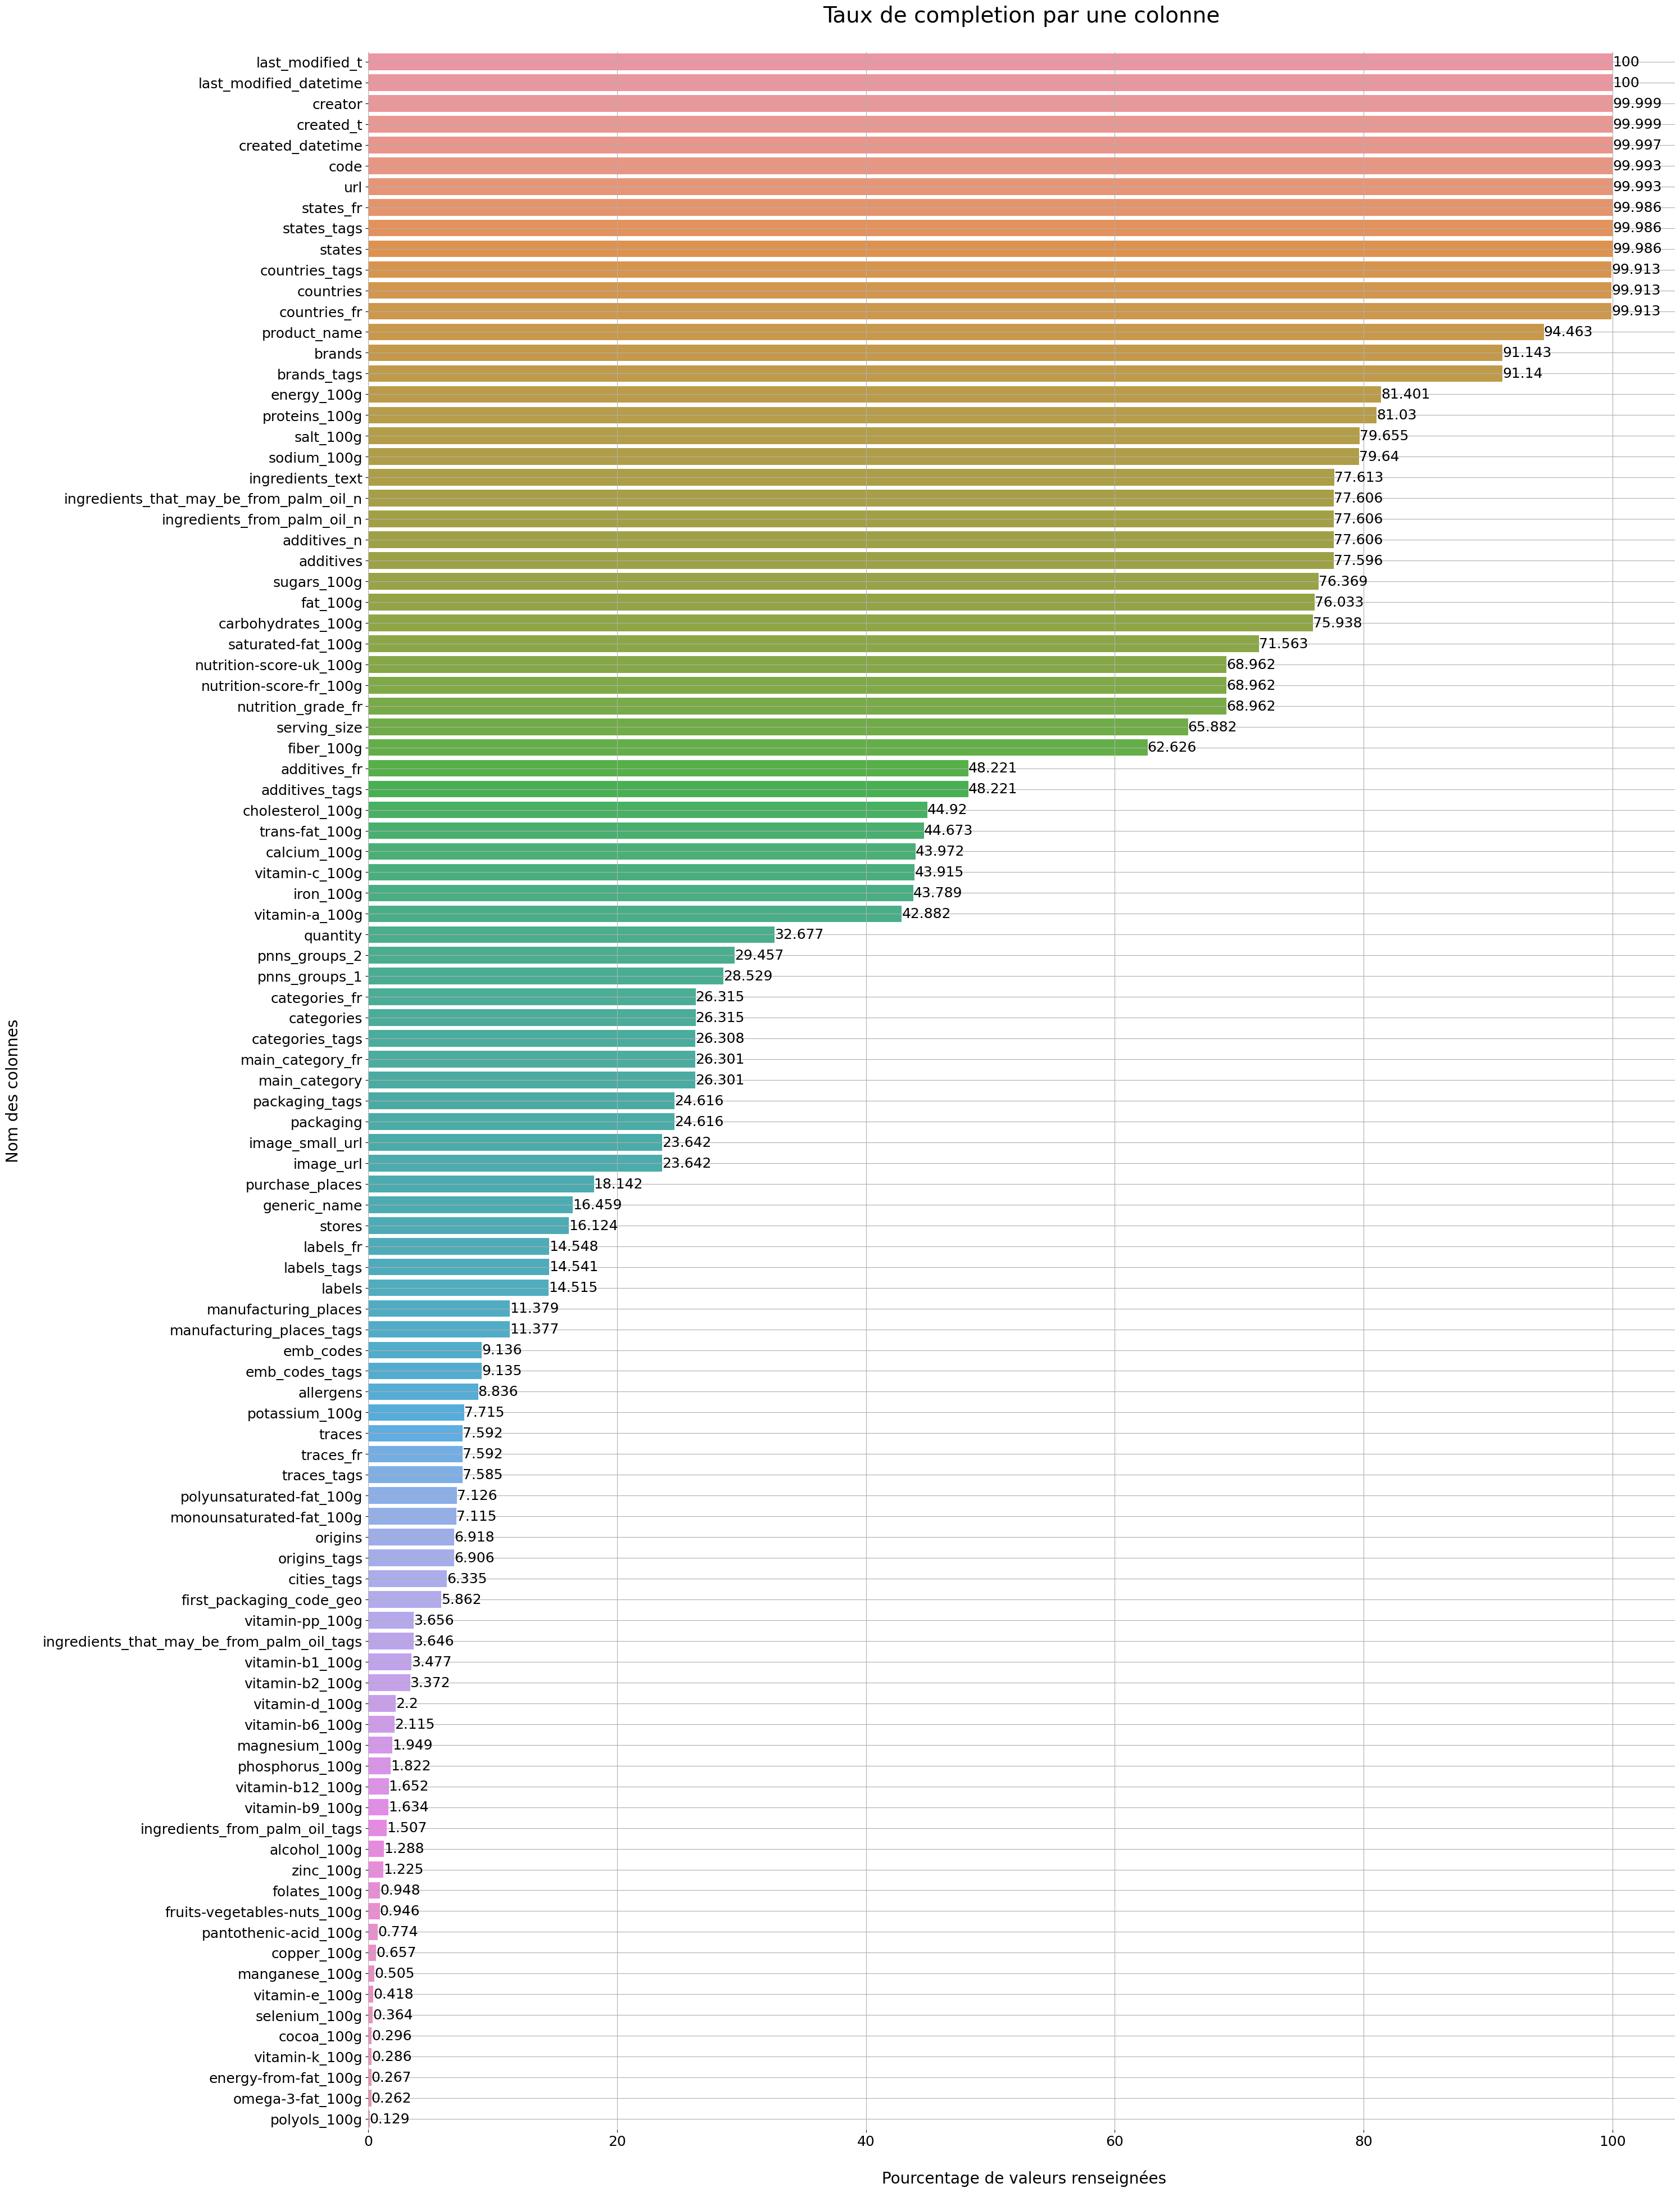

<IPython.core.display.Javascript object>

In [22]:
grapheCompletion(taux_completion)

Nous pouvons observer un nombre importante de valeurs manquante, par conséquent un nettoyage est nécessaire.

# 4. Nettoyage des colonnes, lignes vides et colonnes inutiles

## 4.1 Suppression des colonnes vides

Nous allons supprimer  les colonnes totalement vides. Cette démarche n'aura pas d'impacte sur notre jeu de données

In [23]:
# suppression des colonnes entièrement vides
print(f"Ancien shape= {openfoodfacts.shape}")
a = openfoodfacts.shape[1]
openfoodfacts = openfoodfacts.dropna(how="all", axis=1)  # supprime les colonnes vides
b = openfoodfacts.shape[1]
print(f"Nouveau shape={openfoodfacts.shape}\n \n")

print(
    f"Nous sommes passés de {a} colonnes à {b} colonnes, ainsi nous avons supprimé  {a-b} colonnes qui étaient totalement vides"
)

Ancien shape= (320772, 162)
Nouveau shape=(320772, 146)
 

Nous sommes passés de 162 colonnes à 146 colonnes, ainsi nous avons supprimé  16 colonnes qui étaient totalement vides


<IPython.core.display.Javascript object>

## 4.2 Supression des lignes sans code renseigné

Dans la conception de notre application nous prenons le code du produit comme référence. En outre, dans notre cas le code est l'individu de notre étude, de surcroît, nous devons supprimer toutes les lignes n'ayant pas le code rensigné.

In [24]:
code_manquant = openfoodfacts[
    openfoodfacts["code"].isna()
]  # filtre les lignes où 'code' sont manquantes
code_manquant

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France","en:belgium,en:france","Belgique,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France","Dia,Sogeres",France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France, en:switzerland","en:belgium,en:france,en:switzerland","Belgique,France,Suisse","Lait entier 69.5 %, fruits : fraise 10 %, mang...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,NaN,villecomtal-sur-arros-gers-france,"Veynes,France",SuperU,France,en:france,France,"_Lait_ entier (78%), fruits : mangue, abricot...",Lait,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,NaN,villecomtal-sur-arros-gers-france,"Torcy 77,France",Carrefour,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,France,en:france,France,"_Lait_ écrémé, fruits : fraise (12 %), cerise ...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,NaN,villecomtal-sur-arros-gers-france,"Saint-Priest,France",Auchan,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème, lactiques",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, rhubarbe (8 %), sucre (8 %), la...","Lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, ananas (8 %), sucre (7,1 %), _l...","Lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [25]:
print(code_manquant.shape)
print(f"le nombre de colonnes ayant un code vide est : {code_manquant.shape[0]}")

(23, 146)
le nombre de colonnes ayant un code vide est : 23


<IPython.core.display.Javascript object>

Nous devons supprimer ces 23 lignes manquantes.

In [26]:
listecode = list(
    code_manquant["code"]
)  # création d'une liste ayant tous les codes non renseignés
# listecode

<IPython.core.display.Javascript object>

In [27]:
# Affecter une varible avec les index des non pays 'listecode' dans data
index_code_manquant = openfoodfacts.loc[openfoodfacts["code"].isin(listecode)].index
index_code_manquant

Int64Index([189068, 189103, 189109, 189119, 189152, 189160, 189162, 189168,
            189242, 189244, 189248, 189250, 189260, 189262, 189269, 189272,
            189345, 189362, 189364, 189379, 189404, 189406, 189417],
           dtype='int64')

<IPython.core.display.Javascript object>

Maintenant que nous avons tous les index des lignes des codes manquants nous pouvons les retirer de notre dataframe.

In [28]:
# suppression toutes les lignes ayant l'index dans la liste
print(f"Ancien shape= {openfoodfacts.shape}")
a = openfoodfacts.shape[0]
openfoodfacts.drop(index=index_code_manquant, axis=0, inplace=True)
b = openfoodfacts.shape[0]
print(f"Nouveau shape= {openfoodfacts.shape}\n")
print(f"On a donc supprimé {a-b} lignes")

Ancien shape= (320772, 146)
Nouveau shape= (320749, 146)

On a donc supprimé 23 lignes


<IPython.core.display.Javascript object>

## 4.3 Suppression lignes sans le nom du produit renseigné

Lorsque l'utilisateur scan le code du produit, il est primordial que le nom du produit soit affiché. Il n'est pas possible de compléter les noms manquants de nos produits. Par conséquent nous allons filtré les lignes n'ayant pas 'product_name' renseigné. 

In [29]:
product_manquant = openfoodfacts[
    openfoodfacts["product_name"].isna()
]  # filtre les lignes où 'code' sont manquantes
product_manquant

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,7020254,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,1420150193,2015-01-01T22:09:53Z,1420210373,2015-01-02T14:52:53Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,9336247,http://world-fr.openfoodfacts.org/produit/0000...,tacite,1479029877,2016-11-13T09:37:57Z,1479030010,2016-11-13T09:40:10Z,NaN,Bonbons acidulés Raisin Fraise,"46,7 g",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,50157846,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,1482847730,2016-12-27T14:08:50Z,1482847738,2016-12-27T14:08:58Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,69105241,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1466933518,2016-06-26T09:31:58Z,1466933519,2016-06-26T09:31:59Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320747,9800895250,http://world-fr.openfoodfacts.org/produit/9800...,tacite-mass-editor,1490554697,2017-03-26T18:58:17Z,1490554697,2017-03-26T18:58:17Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320748,9802735,http://world-fr.openfoodfacts.org/produit/9802735,date-limite-app,1472728165,2016-09-01T11:09:25Z,1472728167,2016-09-01T11:09:27Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320752,98709870987,http://world-fr.openfoodfacts.org/produit/9870...,openfoodfacts-contributors,1472254210,2016-08-26T23:30:10Z,1474729393,2016-09-24T15:03:13Z,NaN,NaN,33cl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320755,988639,http://world-fr.openfoodfacts.org/produit/988639,tacite-mass-editor,1490554698,2017-03-26T18:58:18Z,1490554698,2017-03-26T18:58:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [30]:
listeproduct = list(
    product_manquant["product_name"]
)  # création d'une liste ayant tous les codes non renseignés

<IPython.core.display.Javascript object>

In [31]:
# Affecter une varible avec les index de 'listeproduct'
index_product_manquant = openfoodfacts.loc[
    openfoodfacts["product_name"].isin(listeproduct)
].index
index_product_manquant

Int64Index([    48,    183,    187,    227,    233,    260,    275,    280,
               339,    349,
            ...
            320725, 320727, 320739, 320745, 320746, 320747, 320748, 320752,
            320755, 320766],
           dtype='int64', length=17762)

<IPython.core.display.Javascript object>

In [32]:
# suppression toutes les lignes ayant pas le nom du produit
print(f"Ancien shape= {openfoodfacts.shape}")
a = openfoodfacts.shape[0]
openfoodfacts.drop(
    index=index_product_manquant, axis=0, inplace=True
)  # supprime les index de la liste
b = openfoodfacts.shape[0]
print(f"Nouveau shape= {openfoodfacts.shape}\n")
print(f"Nous avons ainsi supprimé {a-b} lignes")

Ancien shape= (320749, 146)
Nouveau shape= (302987, 146)

Nous avons ainsi supprimé 17762 lignes


<IPython.core.display.Javascript object>

## 4.4 Conservation uniquement les produits français

Pour notre application nous allons nous intéresser uniquement aux produit d'origine française

In [33]:
openfoodfacts["countries_fr"].value_counts()  # le nombre de valeurs pour un pays

États-Unis                                               172506
France                                                    87398
Suisse                                                    11189
Allemagne                                                  6824
Espagne                                                    4541
                                                          ...  
Danemark,France,Allemagne,Inde                                1
République tchèque,Danemark,France,Allemagne                  1
Danemark,France,Allemagne,Russie,Espagne,Royaume-Uni          1
Australie,République tchèque,France,Allemagne,Hongrie         1
Chine,Hong Kong                                               1
Name: countries_fr, Length: 689, dtype: int64

<IPython.core.display.Javascript object>

In [34]:
# conservation des produits d'origine français
print(f"Ancien shape= {openfoodfacts.shape}")
a=openfoodfacts.shape[0]
openfoodfacts = openfoodfacts.loc[openfoodfacts['countries_fr']=='France'] #uniquement produit de France
b=openfoodfacts.shape[0]
print(f"Nouveau shape= {openfoodfacts.shape}\n")
print(f"Nous avons ainsi supprimé {a-b} lignes")


Ancien shape= (302987, 146)
Nouveau shape= (87398, 146)

Nous avons ainsi supprimé 215589 lignes


<IPython.core.display.Javascript object>

## 4.5 Suppression des lignes ayant des doublons

Dans le but de nettoyer des lignes ayant des doublons, nous allons utiliser la méthode *drop_duplicates* dans une fonction.

In [35]:
# Deux produits ayant le même code sont effet le même produit
def drop_duplicate_rows(data):
    print("Avant la suppression des lignes en doubles: ", data.shape)
    a = data.shape[0]
    data = data.drop_duplicates(subset=["code"])  # supprimer les doublons de code
    print("Après la suppression de lignes en doubles: ", data.shape)
    b = data.shape[0]
    print(f" \n \n Nous avons supprimé {a-b} lignes en double")
    return data

<IPython.core.display.Javascript object>

In [36]:
openfoodfacts = drop_duplicate_rows(openfoodfacts)  # suppression des doublons de code

Avant la suppression des lignes en doubles:  (87398, 146)
Après la suppression de lignes en doubles:  (87398, 146)
 
 
 Nous avons supprimé 0 lignes en double


<IPython.core.display.Javascript object>

## 4.6 Suppression des données inutiles à notre application

In [37]:
cols_inutile = [
    "additives",
    "additives_tags",
    "brands_tags",
    "categories_tags",
    "countries",
    "countries_tags",
    "created_datetime",
    "created_t",
    "creator",
    "last_modified_datetime",
    "last_modified_t",
    "main_category",
    "states",
    "states_fr",
    "states_tags",
]

print(cols_inutile)

len(cols_inutile)

['additives', 'additives_tags', 'brands_tags', 'categories_tags', 'countries', 'countries_tags', 'created_datetime', 'created_t', 'creator', 'last_modified_datetime', 'last_modified_t', 'main_category', 'states', 'states_fr', 'states_tags']


15

<IPython.core.display.Javascript object>

Réalisons une fonction permettant de supprimer les colonnes à partir d'une liste connue

In [38]:
def suppress_cols(data, to_remove):
    colonnes_a_garder = list(
        set(data.columns).difference(set(to_remove))
    )  # supprimer les colonnes de la liste
    a = data.shape[1]  # nbr de colonne avant
    print("Avant la suppresion des colonnes le shape: ", data.shape)
    data = data[colonnes_a_garder]
    b = data.shape[1]  # nbr de colonne apres
    print("Après la suppression des colonnes le shape: ", data.shape)

    print(f"\n\n Nous avons supprimé {a-b} colonnes")
    return data

<IPython.core.display.Javascript object>

In [39]:
openfoodfacts = suppress_cols(openfoodfacts, cols_inutile)

Avant la suppresion des colonnes le shape:  (87398, 146)
Après la suppression des colonnes le shape:  (87398, 131)


 Nous avons supprimé 15 colonnes


<IPython.core.display.Javascript object>

## 4.7 Conclusion de étape 1 du  Nettoyage

In [40]:
nbr_completion2 = niveau_completion(openfoodfacts)
nbr_completion2

,nbre_renseigne,nbre_non_renseigne,taux_completion
countries_fr,87398,0,100.000000
url,87398,0,100.000000
product_name,87398,0,100.000000
code,87398,0,100.000000
brands,81671,5727,93.447218
...,...,...,...
caprylic-acid_100g,0,87398,0.000000
behenic-acid_100g,0,87398,0.000000
stearic-acid_100g,0,87398,0.000000
cities,0,87398,0.000000


<IPython.core.display.Javascript object>

In [41]:
taux_completion2 = nbr_completion2[
    "taux_completion"
]  # Affiche tous les indicateurs et le nombre de fois renseigné
taux_completion2

countries_fr                        100.000000
url                                 100.000000
product_name                        100.000000
code                                100.000000
brands                               93.447218
                                       ...    
caprylic-acid_100g                    0.000000
behenic-acid_100g                     0.000000
stearic-acid_100g                     0.000000
cities                                0.000000
dihomo-gamma-linolenic-acid_100g      0.000000
Name: taux_completion, Length: 131, dtype: float64

<IPython.core.display.Javascript object>

In [42]:
# Par soucis de lisibilité on affiche seulement les 100 plus renseignés
taux_completion2 = taux_completion2.sort_values(ascending=False)[:100]

<IPython.core.display.Javascript object>

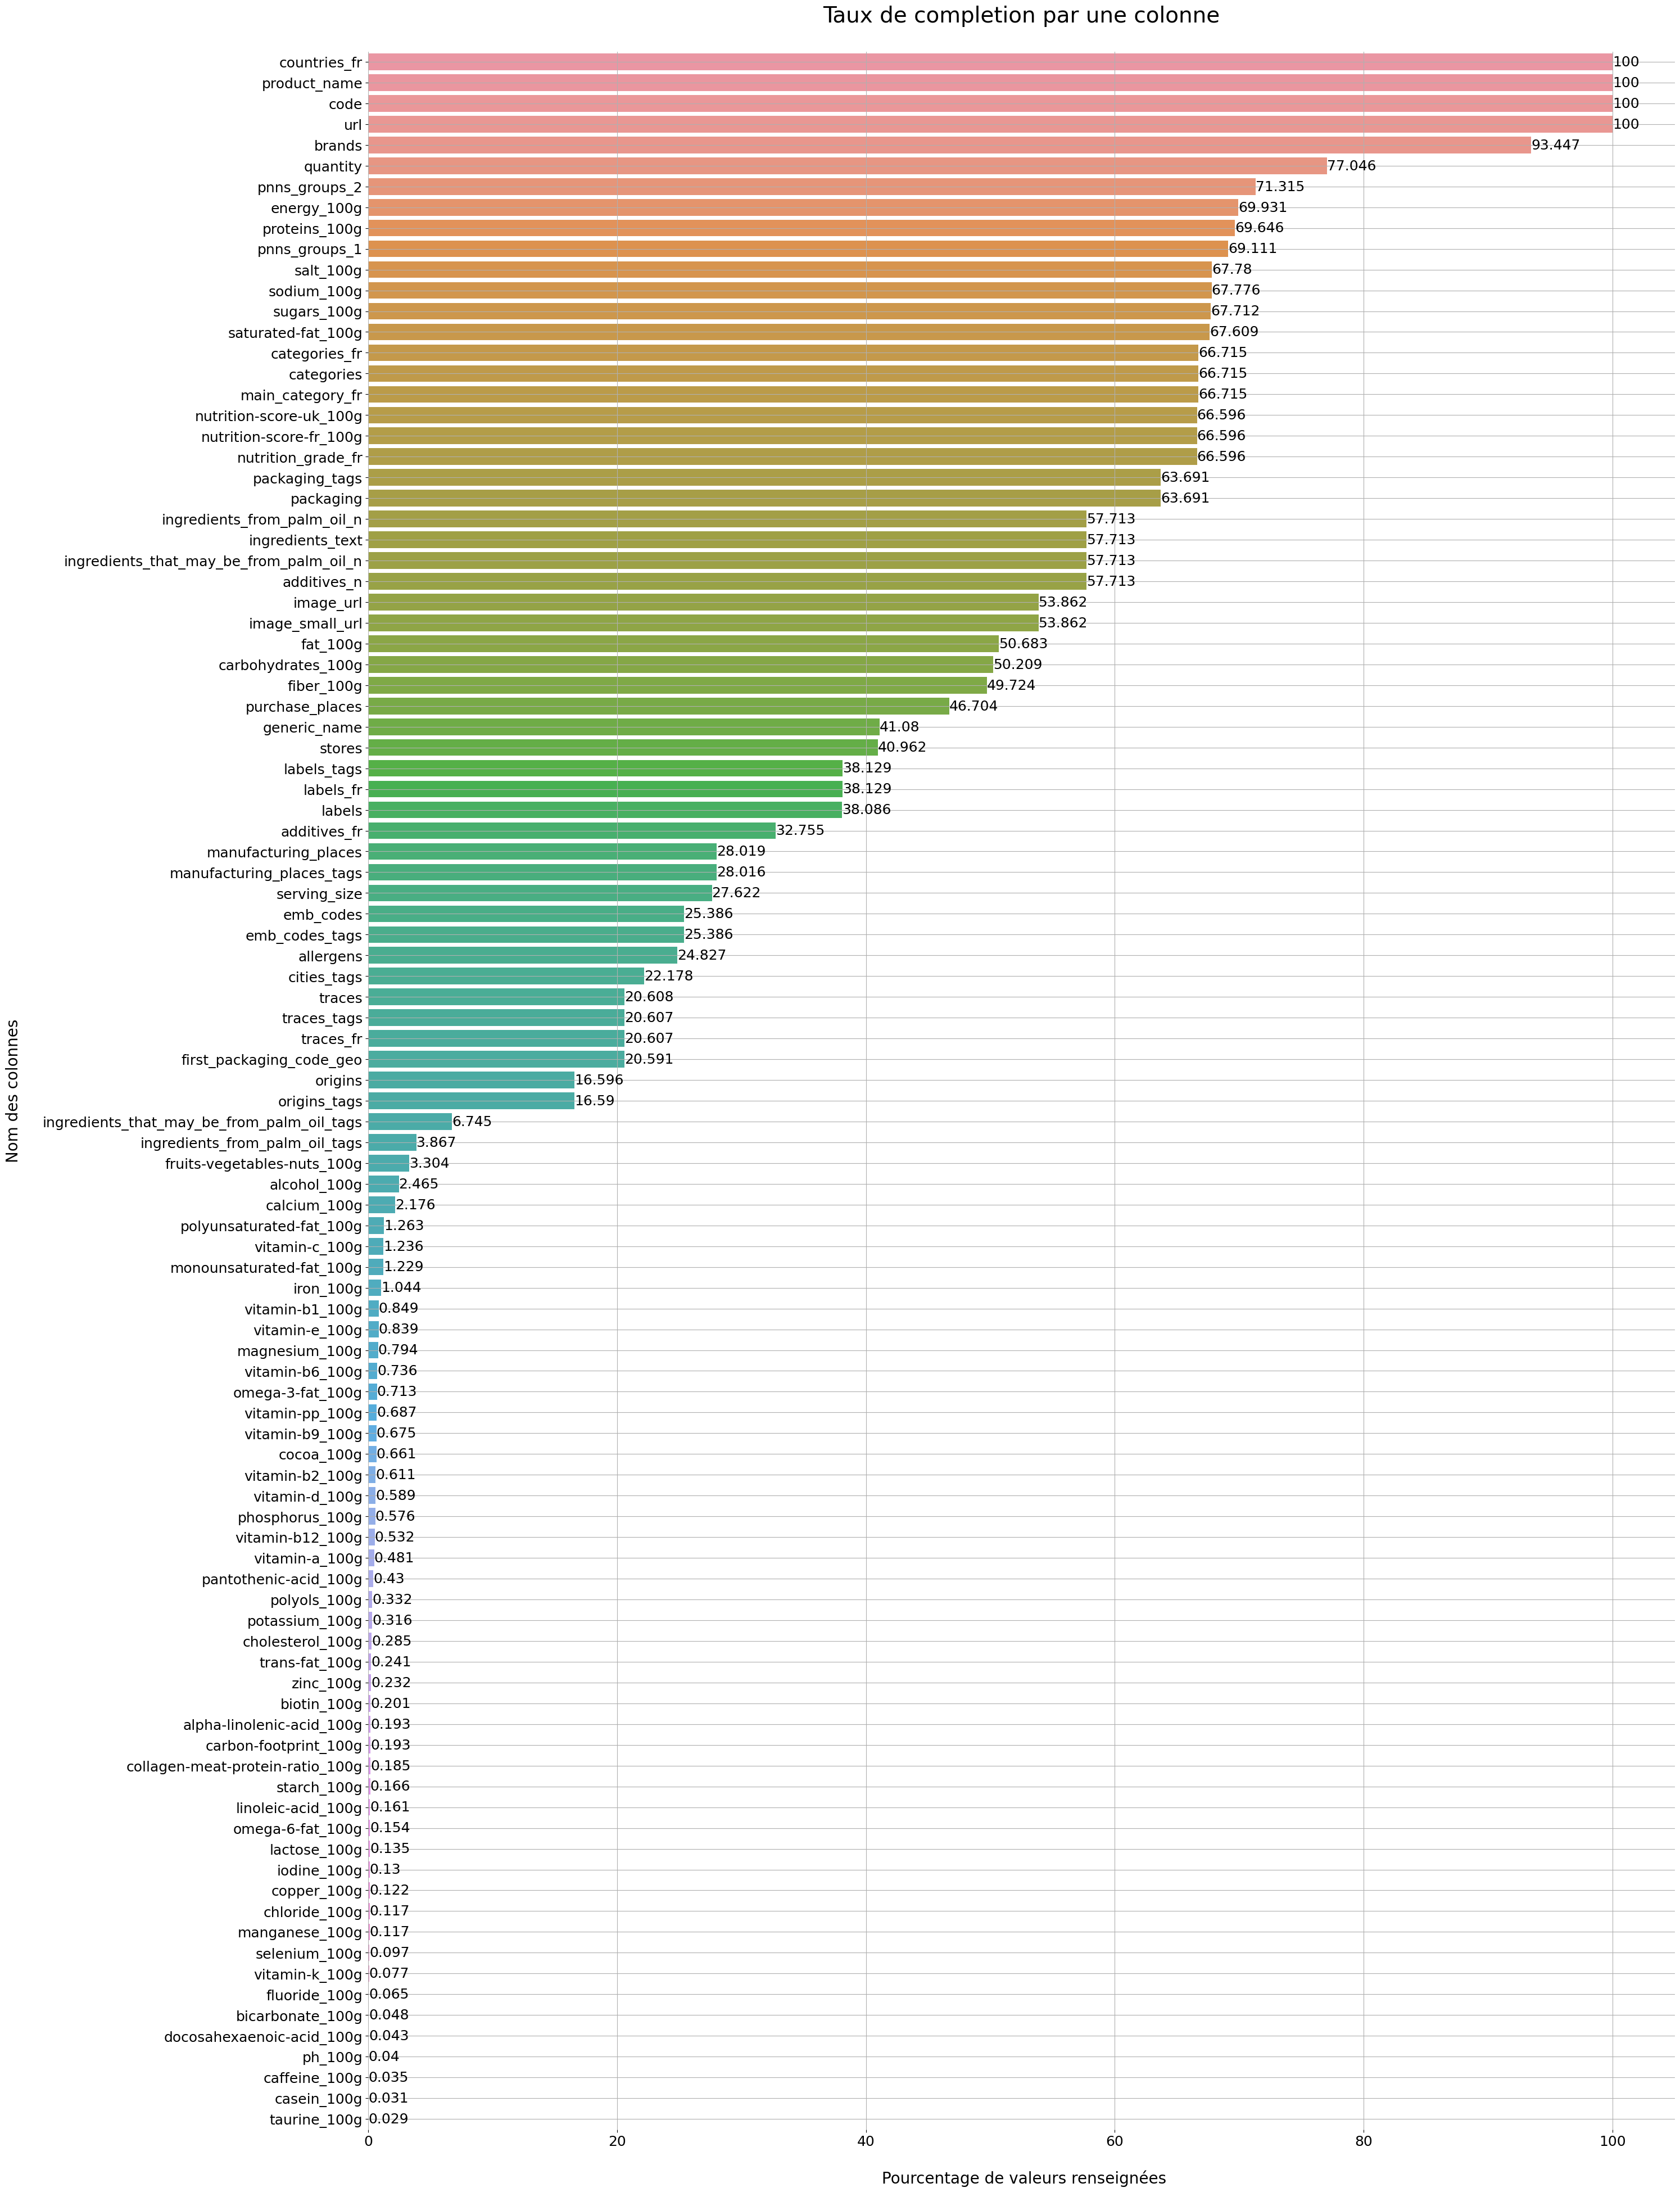

<IPython.core.display.Javascript object>

In [43]:
grapheCompletion(taux_completion2)

In [44]:
print("Data d'origine avant nettoyage \n")
print(original.info())
print("\nData après première étape de nettoyage \n")
print(openfoodfacts.info())

Data d'origine avant nettoyage 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB
None

Data après première étape de nettoyage 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87398 entries, 0 to 320770
Columns: 131 entries, polyols_100g to ph_100g
dtypes: float64(90), object(41)
memory usage: 88.0+ MB
None


<IPython.core.display.Javascript object>

In [45]:
openfoodfacts2 = openfoodfacts  # Afin d'éviter de revenir au debut si erreur

<IPython.core.display.Javascript object>

# 5. Seuil minimum

Nous devons nettoyer les colonnes n'atteignant pas le seuil minimun. Pour cela nous allons tout d'abord identifier les colonnes catégoriques des colonnes numériques. 

## 5.1 Colonnes numériques

### 5.1.1 Création colonnes numériques

Dans notre data nous avons des colonnes numériques et catégoriques, nous devons les distinguer. Pour cela nous savons que la méthode *select_dtypes(include =np.number).columns* permettant de sélectionner uniquement les colonnes de type numérique 

In [46]:
cols_num = openfoodfacts2.select_dtypes(
    include=np.number
).columns  # les colonnes numériques
cols_num

Index(['polyols_100g', 'fruits-vegetables-nuts_100g', 'sugars_100g',
       'salt_100g', 'eicosapentaenoic-acid_100g', 'carbon-footprint_100g',
       'vitamin-k_100g', 'chromium_100g', 'caffeine_100g', 'gondoic-acid_100g',
       'linoleic-acid_100g', 'vitamin-b2_100g', 'manganese_100g',
       'vitamin-b1_100g', 'fiber_100g', 'biotin_100g', 'cocoa_100g',
       'nucleotides_100g', 'folates_100g', 'copper_100g',
       'ingredients_that_may_be_from_palm_oil_n', 'fat_100g',
       'dihomo-gamma-linolenic-acid_100g', 'gamma-linolenic-acid_100g',
       'proteins_100g', 'taurine_100g', 'omega-9-fat_100g', 'vitamin-b9_100g',
       'omega-6-fat_100g', 'ingredients_from_palm_oil_n', 'palmitic-acid_100g',
       'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'additives_n',
       'caprylic-acid_100g', 'silica_100g', 'oleic-acid_100g',
       'vitamin-e_100g', 'calcium_100g', 'molybdenum_100g', 'energy_100g',
       'vitamin-d_100g', 'nutrition-score-fr_100g', 'myristic-acid_100g',
       

<IPython.core.display.Javascript object>

Nous avons ainsi toutes les colonnes numériques affichées ci-dessus.

### 5.1.2 Filtrage colonnes numériques

Maintenant que nous avons déterminer les colonnes numériques, il faut supprimer les colonnes en dessous du seuil minimum. Dans notre cas, le seuil minimun pour ces colonnes est de 40%. Par conséquent toutes les colonnes ayant une valeur inférieur ou égale à 40% des données renseignées seront supprimées.

Dans le but de réaliser un pourcentage nous avons besoin de la valeur maximum du nombre de ligne dans notre data. Puis afin de facilité, le calcul nous affecterons une variable appelée "nbr_ligne" à cette valeur.

In [47]:
nbr_ligne = openfoodfacts2.shape[0]  # nombre de ligne dans le data openfoodfacts
nbr_ligne

87398

<IPython.core.display.Javascript object>

Nous allons dans un premier temps observer le taux de complétion de toutes les colonnes

In [48]:
# taux de complétion en pourcentage
taux_num = openfoodfacts2[cols_num].notna().sum().sort_values() / nbr_ligne * 100
taux_num

gondoic-acid_100g      0.000000
stearic-acid_100g      0.000000
behenic-acid_100g      0.000000
caprylic-acid_100g     0.000000
palmitic-acid_100g     0.000000
                        ...    
sugars_100g           67.712076
sodium_100g           67.776150
salt_100g             67.779583
proteins_100g         69.645758
energy_100g           69.930662
Length: 90, dtype: float64

<IPython.core.display.Javascript object>

Avant de supprimer il serait intéressant d'observer les colonnes ayant un taux de complétion supérieur à 40%

In [49]:
cols_num_sup40 = taux_num[taux_num > 40]  # filtrage valeur à conserver
cols_num_sup40

fiber_100g                                 49.724250
carbohydrates_100g                         50.209387
fat_100g                                   50.683082
additives_n                                57.712991
ingredients_that_may_be_from_palm_oil_n    57.712991
ingredients_from_palm_oil_n                57.712991
nutrition-score-fr_100g                    66.596490
nutrition-score-uk_100g                    66.596490
saturated-fat_100g                         67.609099
sugars_100g                                67.712076
sodium_100g                                67.776150
salt_100g                                  67.779583
proteins_100g                              69.645758
energy_100g                                69.930662
dtype: float64

<IPython.core.display.Javascript object>

Maintenant que nous avons observer les colonnes potentiellement intéressantes pour nous. Nous allons observer les colonnes n'atteignant pas ce seuil. Puis les supprimer.

In [50]:
cols_num_faible = taux_num[taux_num < 40].index
cols_num_faible

Index(['gondoic-acid_100g', 'stearic-acid_100g', 'behenic-acid_100g',
       'caprylic-acid_100g', 'palmitic-acid_100g', 'myristic-acid_100g',
       'dihomo-gamma-linolenic-acid_100g', 'capric-acid_100g',
       'gamma-linolenic-acid_100g', 'arachidic-acid_100g', 'lauric-acid_100g',
       'montanic-acid_100g', 'folates_100g', 'glucose_100g', 'maltose_100g',
       'molybdenum_100g', 'chromium_100g', 'oleic-acid_100g',
       'arachidonic-acid_100g', 'nucleotides_100g', 'beta-carotene_100g',
       'sucrose_100g', 'energy-from-fat_100g', 'maltodextrins_100g',
       'serum-proteins_100g', 'eicosapentaenoic-acid_100g', 'omega-9-fat_100g',
       'fructose_100g', 'silica_100g', 'taurine_100g', 'casein_100g',
       'caffeine_100g', 'ph_100g', 'docosahexaenoic-acid_100g',
       'bicarbonate_100g', 'fluoride_100g', 'vitamin-k_100g', 'selenium_100g',
       'chloride_100g', 'manganese_100g', 'copper_100g', 'iodine_100g',
       'lactose_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'st

<IPython.core.display.Javascript object>

In [51]:
openfoodfacts2 = suppress_cols(openfoodfacts2, cols_num_faible)


Avant la suppresion des colonnes le shape:  (87398, 131)
Après la suppression des colonnes le shape:  (87398, 55)


 Nous avons supprimé 76 colonnes


<IPython.core.display.Javascript object>

In [52]:
cols_num

Index(['polyols_100g', 'fruits-vegetables-nuts_100g', 'sugars_100g',
       'salt_100g', 'eicosapentaenoic-acid_100g', 'carbon-footprint_100g',
       'vitamin-k_100g', 'chromium_100g', 'caffeine_100g', 'gondoic-acid_100g',
       'linoleic-acid_100g', 'vitamin-b2_100g', 'manganese_100g',
       'vitamin-b1_100g', 'fiber_100g', 'biotin_100g', 'cocoa_100g',
       'nucleotides_100g', 'folates_100g', 'copper_100g',
       'ingredients_that_may_be_from_palm_oil_n', 'fat_100g',
       'dihomo-gamma-linolenic-acid_100g', 'gamma-linolenic-acid_100g',
       'proteins_100g', 'taurine_100g', 'omega-9-fat_100g', 'vitamin-b9_100g',
       'omega-6-fat_100g', 'ingredients_from_palm_oil_n', 'palmitic-acid_100g',
       'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'additives_n',
       'caprylic-acid_100g', 'silica_100g', 'oleic-acid_100g',
       'vitamin-e_100g', 'calcium_100g', 'molybdenum_100g', 'energy_100g',
       'vitamin-d_100g', 'nutrition-score-fr_100g', 'myristic-acid_100g',
       

<IPython.core.display.Javascript object>

## 5.2 Colonnes catégoriques

Passons aux colonnes catégoriques. Contrairement aux colonnes numériques le seuil de ces colonnes est de 24%.

### 5.2.1 Création colonnes catégoriques

In [53]:
categ_cols = openfoodfacts2.select_dtypes(exclude=np.number).columns
categ_cols

Index(['traces', 'allergens', 'countries_fr', 'cities', 'nutrition_grade_fr',
       'main_category_fr', 'labels', 'traces_tags', 'emb_codes', 'stores',
       'traces_fr', 'quantity', 'pnns_groups_1', 'manufacturing_places_tags',
       'first_packaging_code_geo', 'url', 'brands', 'pnns_groups_2', 'origins',
       'ingredients_text', 'ingredients_that_may_be_from_palm_oil_tags',
       'allergens_fr', 'image_url', 'packaging_tags', 'additives_fr',
       'manufacturing_places', 'product_name',
       'ingredients_from_palm_oil_tags', 'purchase_places', 'labels_fr',
       'packaging', 'generic_name', 'emb_codes_tags', 'image_small_url',
       'categories_fr', 'labels_tags', 'categories', 'serving_size',
       'origins_tags', 'code', 'cities_tags'],
      dtype='object')

<IPython.core.display.Javascript object>

Nous allons dans un premier temps observer le taux de complétion de toutes les colonnes

In [54]:
taux_categ = openfoodfacts2[categ_cols].notna().sum().sort_values() / nbr_ligne * 100
taux_categ

cities                                          0.000000
allergens_fr                                    0.000000
ingredients_from_palm_oil_tags                  3.867365
ingredients_that_may_be_from_palm_oil_tags      6.745006
origins_tags                                   16.589624
origins                                        16.596490
first_packaging_code_geo                       20.590860
traces_tags                                    20.606879
traces_fr                                      20.606879
traces                                         20.608023
cities_tags                                    22.177853
allergens                                      24.826655
emb_codes_tags                                 25.386164
emb_codes                                      25.386164
serving_size                                   27.621914
manufacturing_places_tags                      28.015515
manufacturing_places                           28.018948
additives_fr                   

<IPython.core.display.Javascript object>

### 5.2.2  Filtrage colonnes catégorique

In [55]:
cols_categ_faible = taux_categ[
    taux_categ < 24
].index  # colonnes numérique inferieur de 24%
cols_categ_faible

Index(['cities', 'allergens_fr', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'origins_tags', 'origins',
       'first_packaging_code_geo', 'traces_tags', 'traces_fr', 'traces',
       'cities_tags'],
      dtype='object')

<IPython.core.display.Javascript object>

In [56]:
openfoodfacts2 = suppress_cols(openfoodfacts2, cols_categ_faible)

Avant la suppresion des colonnes le shape:  (87398, 55)
Après la suppression des colonnes le shape:  (87398, 44)


 Nous avons supprimé 11 colonnes


<IPython.core.display.Javascript object>

## 5.3 Conclusion de étape 2 Nettoyage

In [57]:
nbr_completion3 = niveau_completion(openfoodfacts2)
nbr_completion3

,nbre_renseigne,nbre_non_renseigne,taux_completion
url,87398,0,100.000000
product_name,87398,0,100.000000
code,87398,0,100.000000
countries_fr,87398,0,100.000000
brands,81671,5727,93.447218
quantity,67337,20061,77.046386
pnns_groups_2,62328,25070,71.315133
energy_100g,61118,26280,69.930662
proteins_100g,60869,26529,69.645758
pnns_groups_1,60402,26996,69.111421


<IPython.core.display.Javascript object>

In [58]:
nbr_completion3.shape

(44, 3)

<IPython.core.display.Javascript object>

In [59]:
taux_completion3 = nbr_completion3[
    "taux_completion"
]  # Affiche tous les indicateurs et le nombre de fois renseigné
taux_completion3

url                                        100.000000
product_name                               100.000000
code                                       100.000000
countries_fr                               100.000000
brands                                      93.447218
quantity                                    77.046386
pnns_groups_2                               71.315133
energy_100g                                 69.930662
proteins_100g                               69.645758
pnns_groups_1                               69.111421
salt_100g                                   67.779583
sodium_100g                                 67.776150
sugars_100g                                 67.712076
saturated-fat_100g                          67.609099
categories                                  66.715485
categories_fr                               66.715485
main_category_fr                            66.715485
nutrition-score-fr_100g                     66.596490
nutrition-score-uk_100g     

<IPython.core.display.Javascript object>

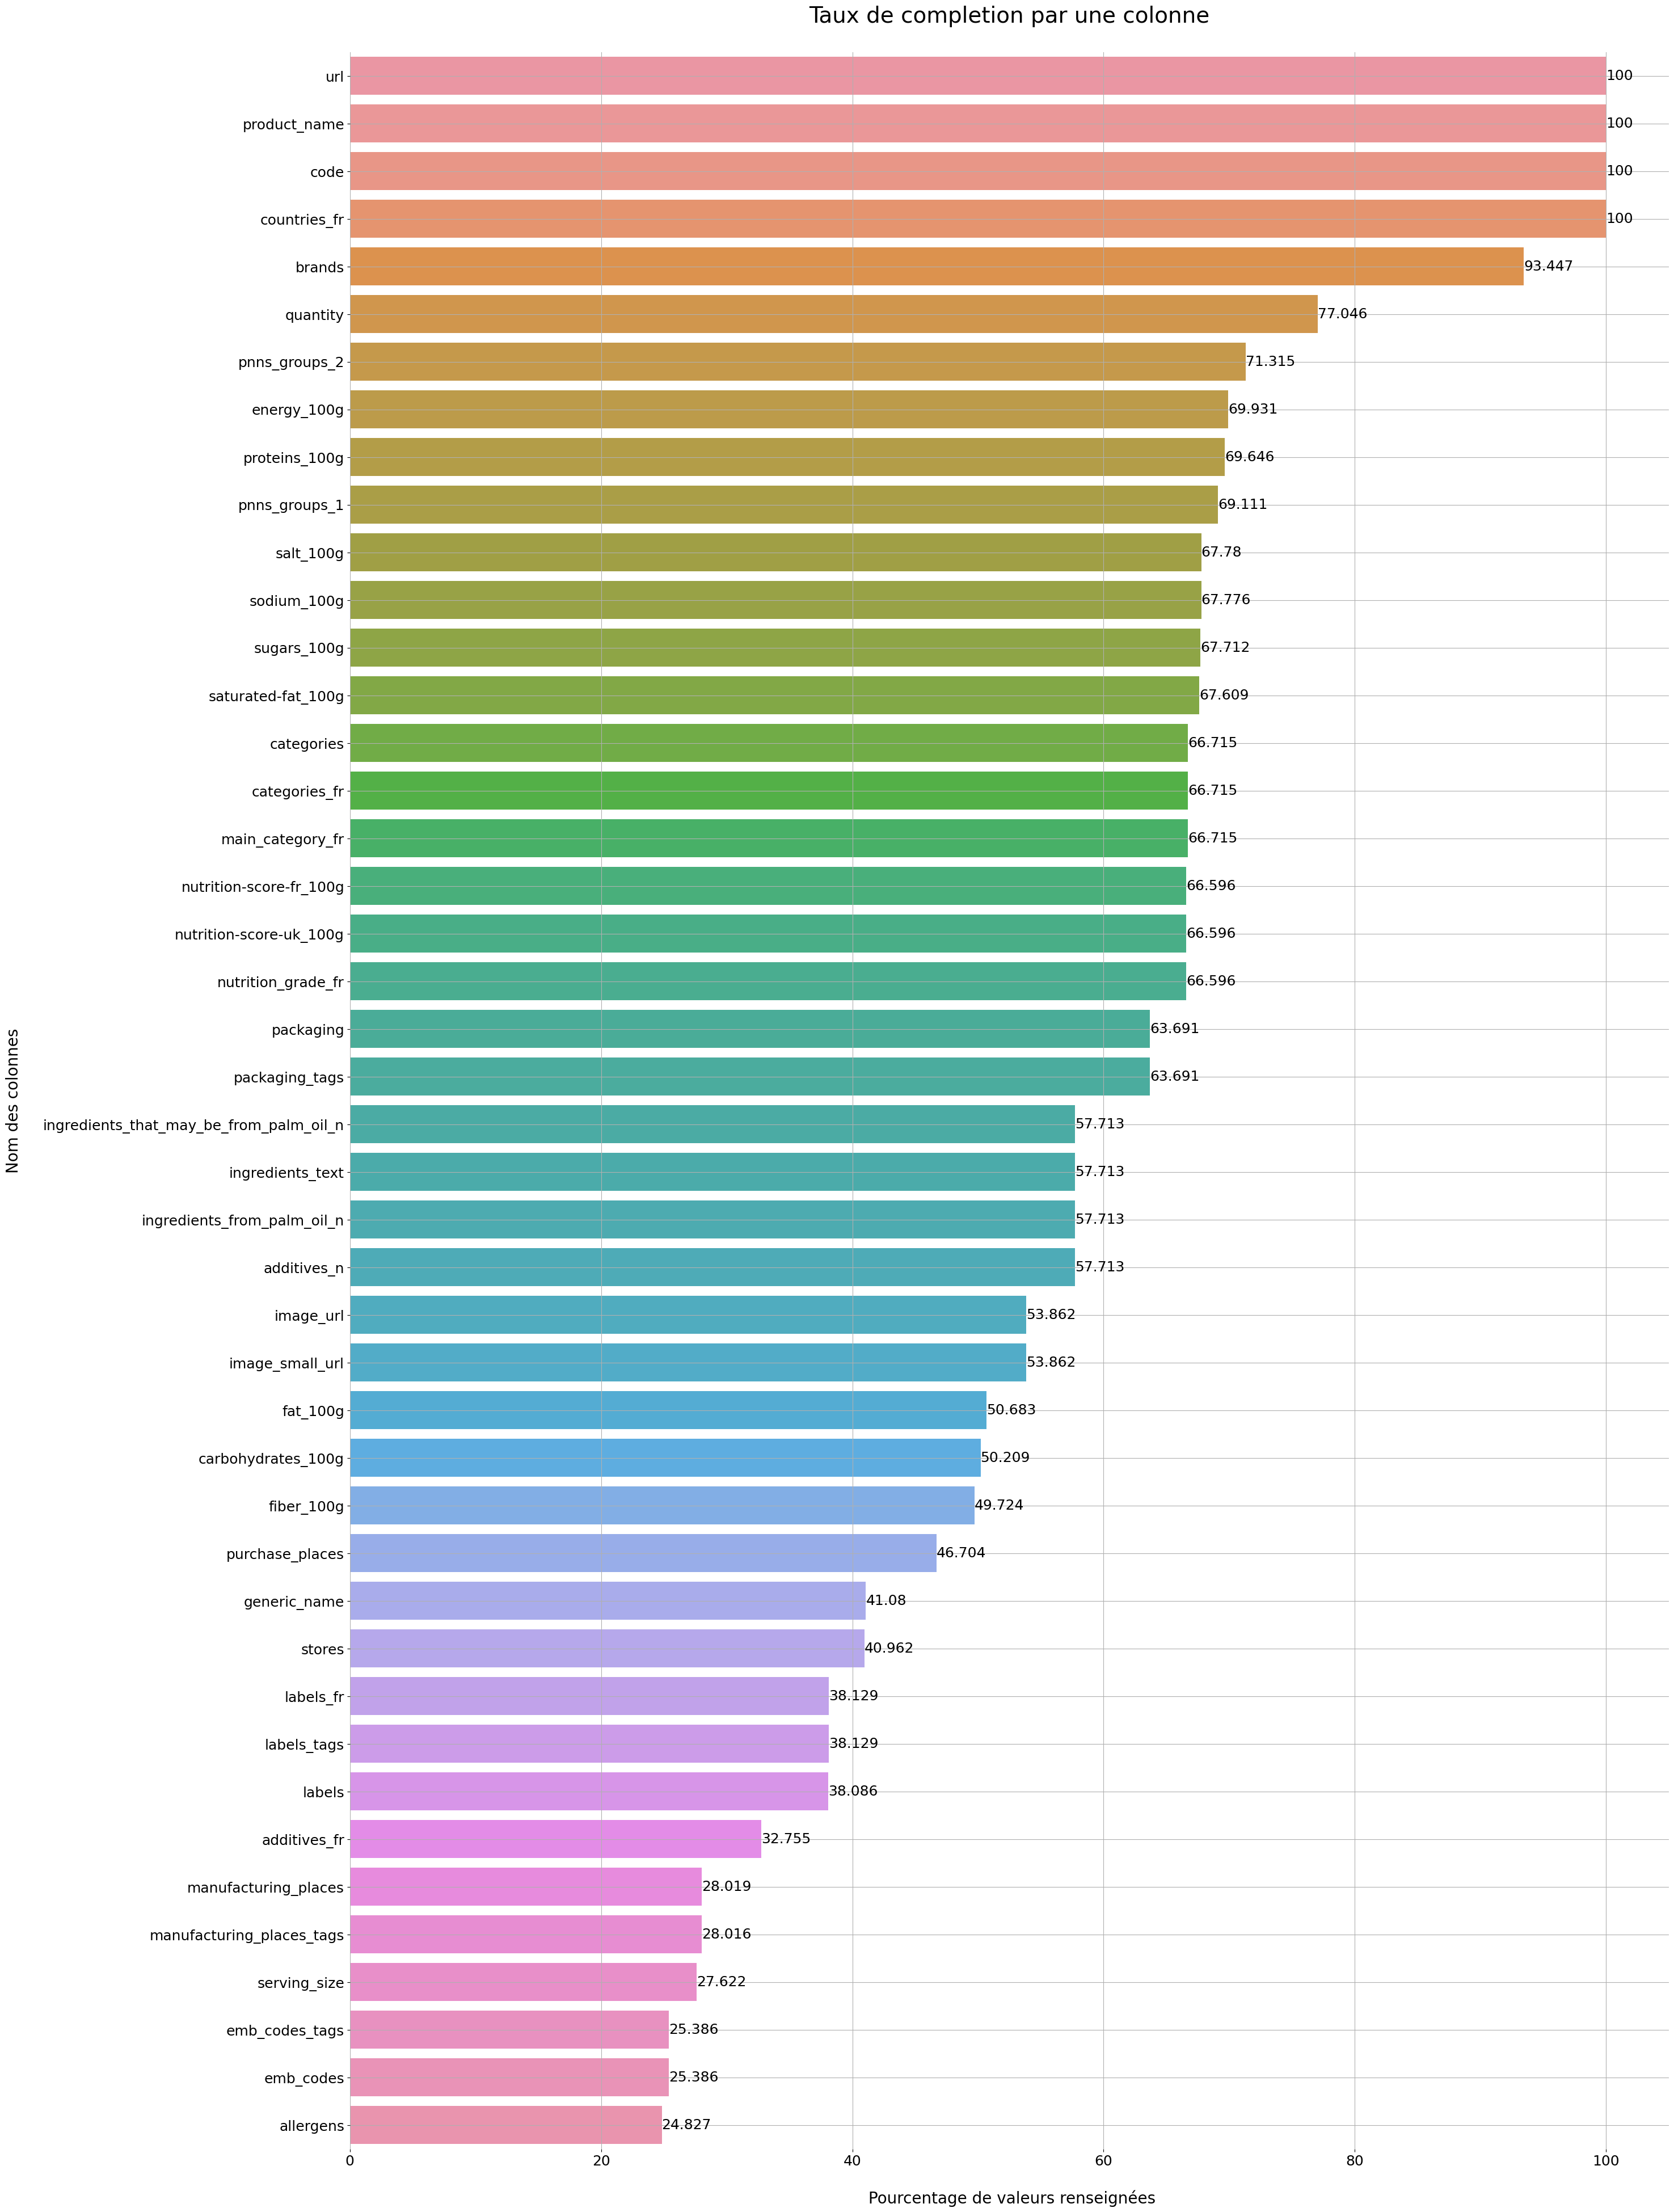

<IPython.core.display.Javascript object>

In [60]:
grapheCompletion(taux_completion3)

# 6. Données très corrélées

On va supprimer les valeurs très corrélées

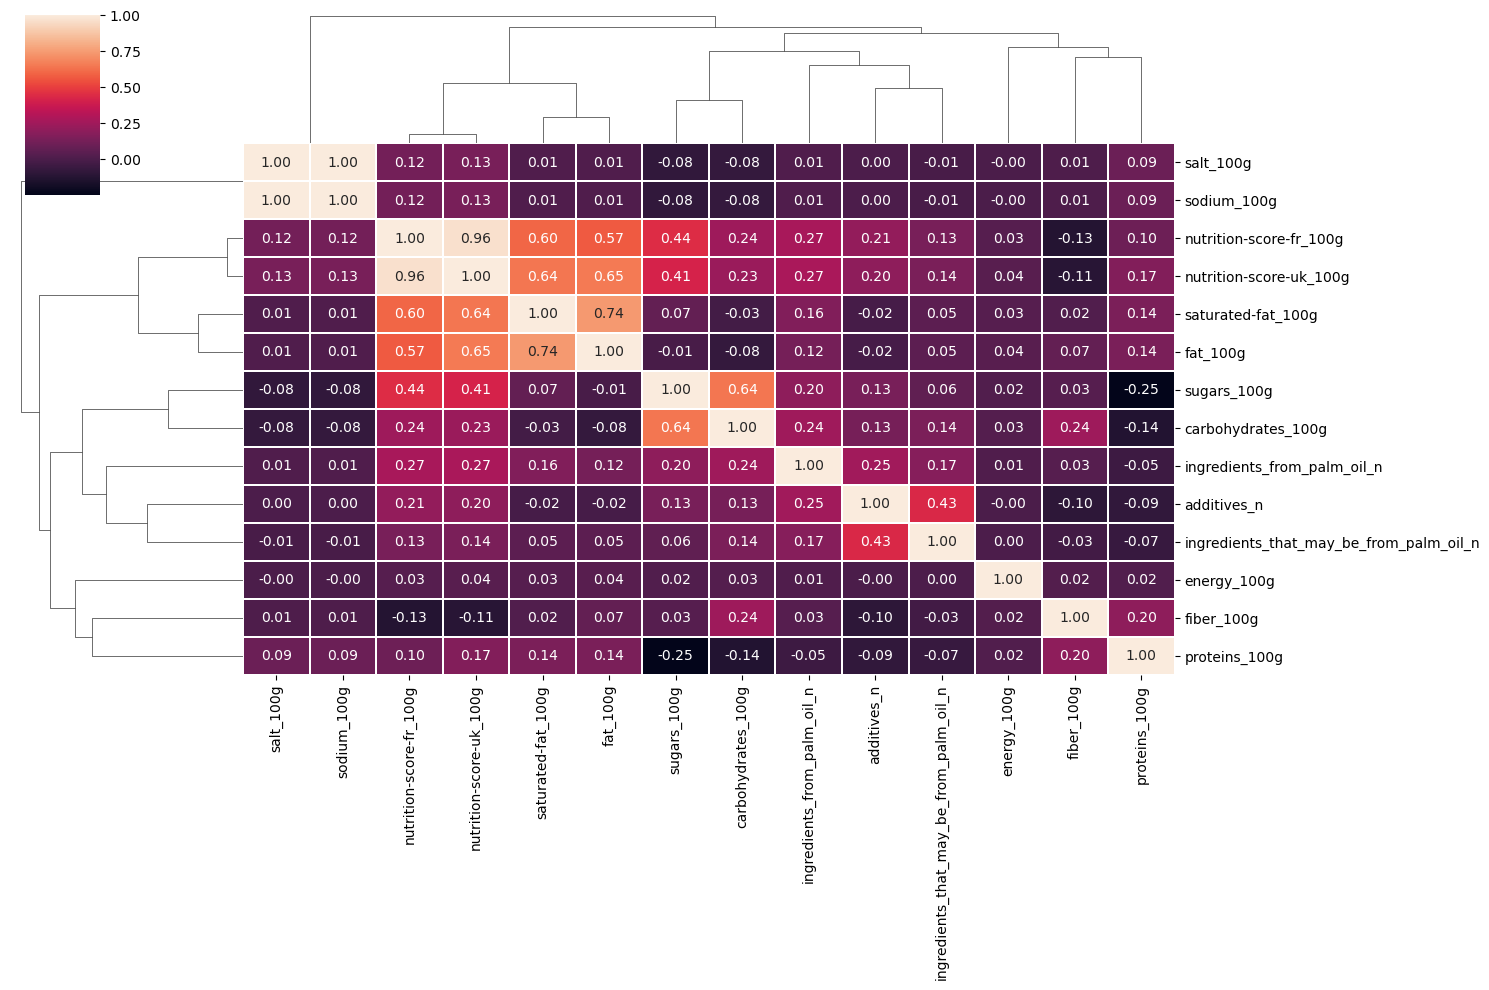

<IPython.core.display.Javascript object>

In [61]:
corr_mat = sns.clustermap(
    openfoodfacts2.select_dtypes(include=np.number).corr(),
    annot=True,
    linewidths=0.1,
    fmt=".2f",
    figsize=(15, 10),
)
corr_mat

Les colonnes très corrélées vont être supprimées ici 'nutrition-score-uk_100g','sodium_100g'. Cela peut s'expliquer par le faite que le sel est du Chlorure de Sodium, puis que le nutri-score a la même unité qu'il soit français ou en anglais

In [62]:
cols_corr = [
    "nutrition-score-uk_100g",
    "sodium_100g",
]  # liste des 2 colonnes très corrélées

<IPython.core.display.Javascript object>

In [63]:
openfoodfacts2 = suppress_cols(
    openfoodfacts2, cols_corr
)  # suppression des colonnes corrélées du data

Avant la suppresion des colonnes le shape:  (87398, 44)
Après la suppression des colonnes le shape:  (87398, 42)


 Nous avons supprimé 2 colonnes


<IPython.core.display.Javascript object>

# 7. Mise à jour: les colonnes numériques et catégoriques

Afin d'éviter de futur erreurs, nous allons mettre à jour les colonnes numériques et catégoriques modifiées

In [64]:
cols_num = openfoodfacts2.select_dtypes(
    include=np.number
).columns  # les colonnes numériques mise à jour
print(cols_num)
print(f"\n\n Le nombre de colonnes numérique est : {len(cols_num)}")

Index(['sugars_100g', 'salt_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'ingredients_from_palm_oil_n', 'additives_n', 'fiber_100g',
       'nutrition-score-fr_100g', 'energy_100g',
       'ingredients_that_may_be_from_palm_oil_n', 'fat_100g', 'proteins_100g'],
      dtype='object')


 Le nombre de colonnes numérique est : 12


<IPython.core.display.Javascript object>

In [65]:
categ_cols = openfoodfacts2.select_dtypes(
    exclude=np.number
).columns  # les colonnes catégoriques mise à jour
print(categ_cols)
print(f"\n\n Le nombre de colonnes catégorique est : {len(categ_cols)}")

Index(['allergens', 'countries_fr', 'nutrition_grade_fr', 'main_category_fr',
       'labels', 'stores', 'emb_codes', 'quantity', 'pnns_groups_1',
       'manufacturing_places_tags', 'url', 'brands', 'pnns_groups_2',
       'ingredients_text', 'additives_fr', 'image_url', 'packaging_tags',
       'purchase_places', 'manufacturing_places', 'product_name', 'labels_fr',
       'packaging', 'generic_name', 'emb_codes_tags', 'image_small_url',
       'categories_fr', 'labels_tags', 'categories', 'serving_size', 'code'],
      dtype='object')


 Le nombre de colonnes catégorique est : 30


<IPython.core.display.Javascript object>

# 8. Valeurs abérrantes du produit (quantité impossible)

Certaines valeurs ont des valeurs quantitative abérrante dans 100g d'un produit. De surcroît, nous allons nous focaliser uniquement sur les colonnes numériques. 

In [66]:
cols_num

Index(['sugars_100g', 'salt_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'ingredients_from_palm_oil_n', 'additives_n', 'fiber_100g',
       'nutrition-score-fr_100g', 'energy_100g',
       'ingredients_that_may_be_from_palm_oil_n', 'fat_100g', 'proteins_100g'],
      dtype='object')

<IPython.core.display.Javascript object>

In [67]:
# toutes les colonnes comportant le nom "100g"
cols_100g = [col for col in cols_num if "100g" in col]
print(
    f"Le nombre de colonne se basant sur 100g de la quantité du produit est : {len(cols_100g)} "
)
cols_100g

Le nombre de colonne se basant sur 100g de la quantité du produit est : 9 


['sugars_100g',
 'salt_100g',
 'carbohydrates_100g',
 'saturated-fat_100g',
 'fiber_100g',
 'nutrition-score-fr_100g',
 'energy_100g',
 'fat_100g',
 'proteins_100g']

<IPython.core.display.Javascript object>

Les valeurs quantitative dans notre cas ne peuvent pas prendre de valeurs négative. De plus dans 100g de produit nous pouvons pas avoir une masse supérieur à 100g de ce produit.  Ensuite après une recherche internet, nous apprenons que la valeur de l'énergie dans un produit de 100g ne peut pas excéder 3500 kJ. 

In [68]:
# Remplacer par NaN les valeurs aberrantes à l'aide d'une condition
for col in cols_100g:
    if col == "energy_100g":
        openfoodfacts2.loc[
            (openfoodfacts2[col] > 3500) | (openfoodfacts2[col] < 0), col
        ] = np.NaN
    else:
        openfoodfacts2.loc[
            (openfoodfacts2[col] > 100) | (openfoodfacts2[col] < 0), col
        ] = np.NaN

<IPython.core.display.Javascript object>

Ainsi toutes ces valeurs abérrante prennent la valeur np.NaN

# 9.  Les outliers

## 9.1 Détection univariée des outliers avec  méthode IQR (écart interquartile) et les Box Plot

Afin de pouvoir détecter les outliers nous allons utilsé la méthode des boîtes à moustaches. Elle utilise des quartiles (points qui divisent les données en quatre groupes de taille égale) pour représenter la forme des données. La boîte représente les premier et troisième quartiles, équivalents aux 25ème et 75ème centiles. La ligne à l'intérieur de la boîte correspond au deuxième quartile, qui est la médiane.

L'écart interquartile est l'écart entre le premier quartile et le troisième quartile (bordures de la boîte). En outre tous les points de données se trouvant au-delà de 1,5 fois l'IQR en dessous du premier quartile ou au-dessus du troisième quartile sont considérés comme des outliers. 

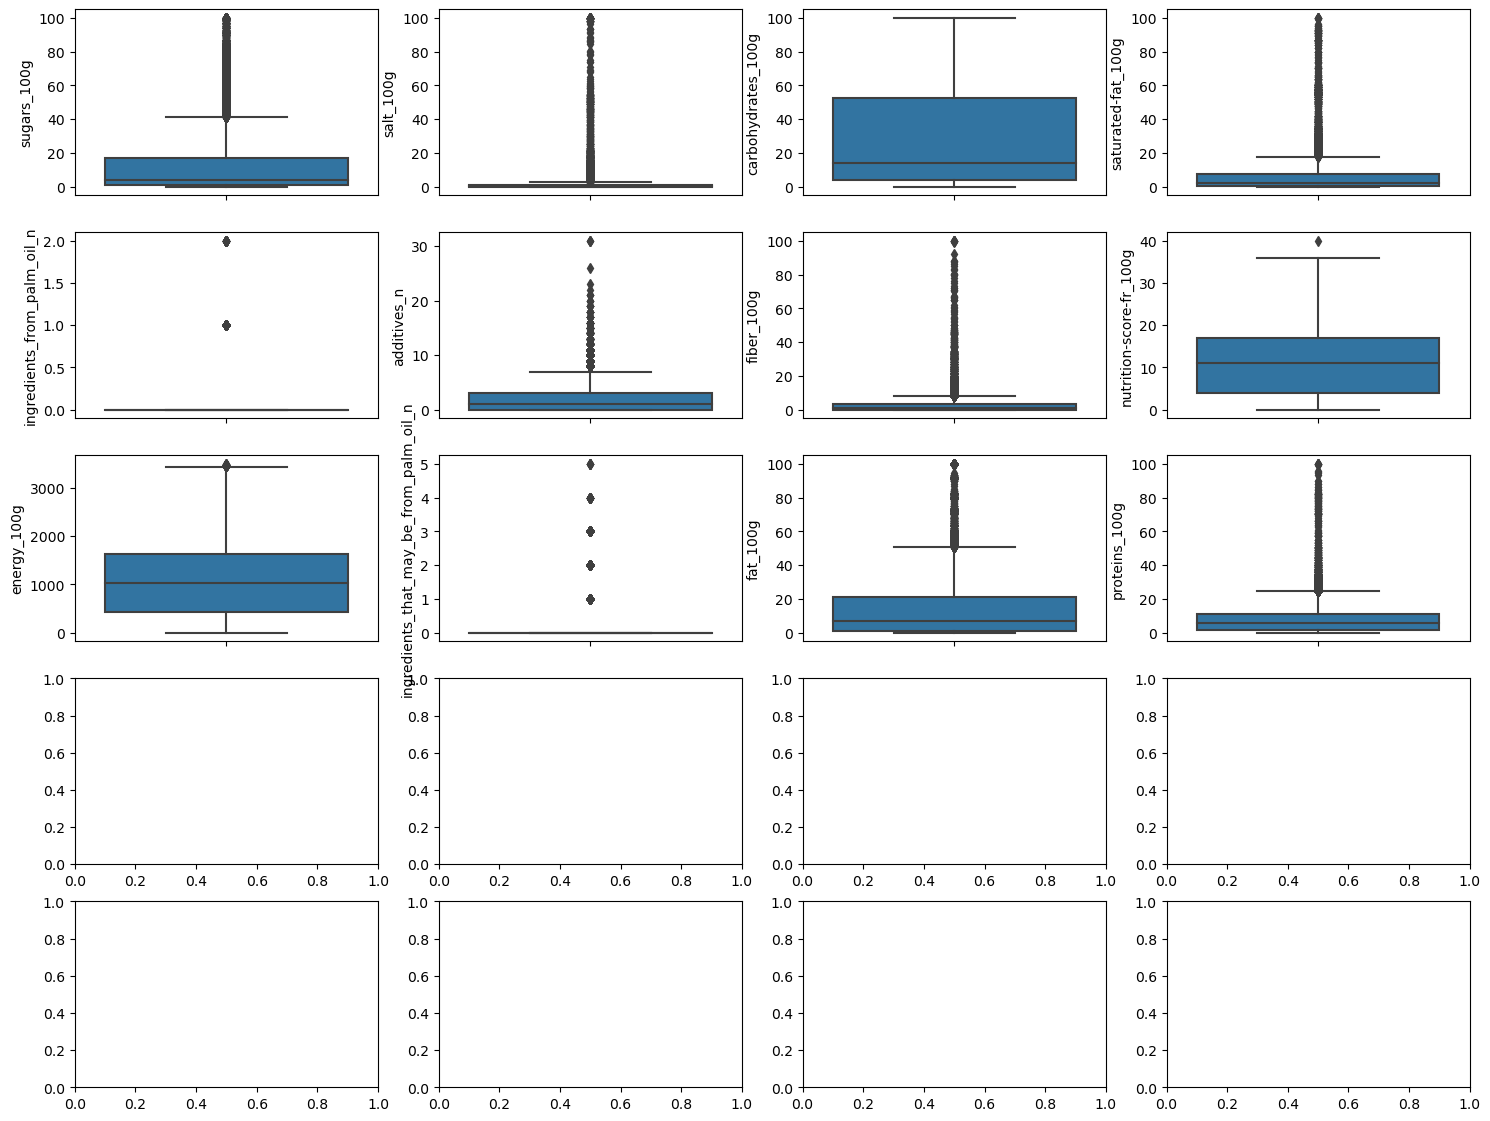

<IPython.core.display.Javascript object>

In [77]:
fig, axes = plt.subplots(5, 4, figsize=(18, 14))
axs = axes.reshape(20, 1)
i = 0
for col in cols_num:
    sns.boxplot(data=openfoodfacts2, y=col, ax=axs[i, 0])
    i = i + 1

## 9.2 Méthode avec les nuages de points

In [78]:
def scatter(var, nutri_score):  # fonction de nuages de point
    df = openfoodfacts2[openfoodfacts2["nutrition_grade_fr"] == nutri_score]
    fig, axes = plt.subplots(4, 3, figsize=(18, 14))
    axs = axes.reshape(-1)
    i = 0
    for col in cols_num:
        sns.scatterplot(data=df, x=var, y=col, ax=axs[i])
        i = i + 1
    plt.title(f"{var} dans nutri_score={nutri_score}")

<IPython.core.display.Javascript object>

In [79]:
scatter_widget = interactive(
    scatter, var=cols_num, nutri_score=["a", "b", "c", "d", "e"]
)
scatter_controls = HBox(
    scatter_widget.children[:-1], layout=Layout(flex_flow="row wrap")
)
scatter_output = scatter_widget.children[-1]
display(VBox([scatter_controls, scatter_output]))

<IPython.core.display.Javascript object>

In [80]:
cols_num

Index(['sugars_100g', 'salt_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'ingredients_from_palm_oil_n', 'additives_n', 'fiber_100g',
       'nutrition-score-fr_100g', 'energy_100g',
       'ingredients_that_may_be_from_palm_oil_n', 'fat_100g', 'proteins_100g'],
      dtype='object')

<IPython.core.display.Javascript object>

In [81]:
openfoodfacts2.loc[openfoodfacts2["proteins_100g"] > 90][
    [
        "product_name",
        "sugars_100g",
        "ingredients_from_palm_oil_n",
        "proteins_100g",
        "carbohydrates_100g",
        "additives_n",
        "fiber_100g",
        "energy_100g",
        "saturated-fat_100g",
        "ingredients_that_may_be_from_palm_oil_n",
        "salt_100g",
        "nutrition-score-fr_100g",
        "fat_100g",
    ]
]

,product_name,sugars_100g,ingredients_from_palm_oil_n,proteins_100g,carbohydrates_100g,additives_n,fiber_100g,energy_100g,saturated-fat_100g,ingredients_that_may_be_from_palm_oil_n,salt_100g,nutrition-score-fr_100g,fat_100g
127525,Savarez - Jeu De Cordes,0.1,NaN,100.0,NaN,NaN,100.0,4.0,0.1,NaN,0.00,NaN,NaN
170118,Harry Potter & The Deathly Hallows Radcliffe /...,0.0,NaN,100.0,NaN,NaN,100.0,4.0,0.0,NaN,0.00,NaN,NaN
198798,Le saunier de camargue,0.5,NaN,96.0,NaN,NaN,0.0,243.0,36.0,NaN,100.00,20.0,NaN
213017,Edulcorant a l'extrait de stevia,6.9,NaN,93.1,NaN,NaN,0.0,1556.0,0.0,NaN,0.08,0.0,NaN
222741,"Lingettes pocket pour visage et mains, biodégr...",6.0,NaN,99.0,NaN,NaN,1.0,1912.0,6.0,NaN,2.00,18.0,NaN
228018,Fromage blanc brebis,2.9,NaN,94.7,NaN,NaN,0.0,364.0,3.2,NaN,0.10,NaN,NaN
273543,Le Hobbit : La Bataille Des Cinq Armés - Versi...,0.0,NaN,100.0,NaN,NaN,100.0,4.0,0.0,NaN,0.00,NaN,NaN
283105,Eau,100.0,NaN,100.0,NaN,NaN,100.0,418.0,100.0,NaN,2.00,24.0,NaN
285429,Marshall - Major Noir,5.0,NaN,100.0,NaN,NaN,100.0,21.0,5.0,NaN,50.00,10.0,NaN
303889,Mini Gressins,2.5,NaN,95.0,NaN,NaN,3.5,1640.0,4.0,NaN,2.00,11.0,NaN


<IPython.core.display.Javascript object>

In [82]:
ouliers_index = {}  # création d'un dictionnaire avec index outliers

<IPython.core.display.Javascript object>

In [83]:
ouliers_index["proteins_100g"] = openfoodfacts2.loc[
    openfoodfacts2["proteins_100g"] > 85
].index
ouliers_index["fiber_100g"] = openfoodfacts2.loc[
    openfoodfacts2["fiber_100g"] > 85
].index
ouliers_index["fat_100g"] = openfoodfacts2.loc[openfoodfacts2["fat_100g"] > 90].index

ouliers_index["carbohydrates_100g"] = openfoodfacts2.loc[
    openfoodfacts2["carbohydrates_100g"] > 95
].index
ouliers_index["sugars_100g"] = openfoodfacts2.loc[
    openfoodfacts2["sugars_100g"] > 95
].index
ouliers_index["additives_n"] = openfoodfacts2.loc[
    openfoodfacts2["additives_n"] > 30
].index

# salt_100g
c1 = (openfoodfacts2["nutrition_grade_fr"] == "a") & (openfoodfacts2["salt_100g"] > 10)
c2 = (openfoodfacts2["nutrition_grade_fr"] == "b") & (openfoodfacts2["salt_100g"] > 20)
ouliers_index["salt_100g"] = openfoodfacts2.loc[c1 | c2].index

<IPython.core.display.Javascript object>

In [84]:
ouliers_index

{'proteins_100g': Int64Index([127525, 170118, 193318, 198798, 213017, 222741, 228018, 249196,
             273543, 274143, 274144, 274145, 283105, 285429, 303889, 318627],
            dtype='int64'),
 'fiber_100g': Int64Index([127525, 170118, 225939, 229692, 244464, 244661, 251364, 251414,
             256886, 273543, 283105, 285429, 310102],
            dtype='int64'),
 'fat_100g': Int64Index([115021, 115370, 144880, 175293, 177124, 177139, 177219, 177338,
             177341, 177535,
             ...
             311909, 311910, 311965, 313420, 313907, 315385, 315860, 316233,
             320578, 320656],
            dtype='int64', length=409),
 'carbohydrates_100g': Int64Index([ 99452, 146335, 171529, 176051, 176175, 176179, 178385, 178979,
             178980, 179003,
             ...
             310175, 311768, 312168, 313011, 315139, 315942, 315944, 316056,
             320681, 320702],
            dtype='int64', length=291),
 'sugars_100g': Int64Index([ 99452, 175268, 179003, 1

<IPython.core.display.Javascript object>

Nous allons remplacer tous les outliers par la valeur *np.nan*

In [85]:
for col, index in ouliers_index.items():
    openfoodfacts2.loc[index, col] = np.nan

<IPython.core.display.Javascript object>

In [86]:
openfoodfacts2["code"].info()

<class 'pandas.core.series.Series'>
Int64Index: 87398 entries, 0 to 320770
Series name: code
Non-Null Count  Dtype 
--------------  ----- 
87398 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


<IPython.core.display.Javascript object>

# 10. Erreur de frappe des colonnes catégoriques

Lors de l'entrée des valeurs dans le tableau, il est possible d'avoir des erreur de frappe. Ainsi nous allons corriger cette erreur pour les valeurs qualitative.

In [87]:
openfoodfacts2["code"].info()

<class 'pandas.core.series.Series'>
Int64Index: 87398 entries, 0 to 320770
Series name: code
Non-Null Count  Dtype 
--------------  ----- 
87398 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


<IPython.core.display.Javascript object>

In [88]:
categ_cols

Index(['allergens', 'countries_fr', 'nutrition_grade_fr', 'main_category_fr',
       'labels', 'stores', 'emb_codes', 'quantity', 'pnns_groups_1',
       'manufacturing_places_tags', 'url', 'brands', 'pnns_groups_2',
       'ingredients_text', 'additives_fr', 'image_url', 'packaging_tags',
       'purchase_places', 'manufacturing_places', 'product_name', 'labels_fr',
       'packaging', 'generic_name', 'emb_codes_tags', 'image_small_url',
       'categories_fr', 'labels_tags', 'categories', 'serving_size', 'code'],
      dtype='object')

<IPython.core.display.Javascript object>

## 10.1 Correction pour 'pnns_groups_1'

In [89]:
openfoodfacts2["pnns_groups_1"]

0                          NaN
46                     unknown
136                    unknown
182       Cereals and potatoes
184              Sugary snacks
                  ...         
320761                     NaN
320763               Beverages
320764                     NaN
320765          Fish Meat Eggs
320770                     NaN
Name: pnns_groups_1, Length: 87398, dtype: object

<IPython.core.display.Javascript object>

In [90]:
# mettre en minuscules
def minuscule(x):
    if x == None or type(x) == float:
        return x
    else:
        minu = x.lower()
        return minu

<IPython.core.display.Javascript object>

In [91]:
openfoodfacts2["pnns_groups_1"] = openfoodfacts2["pnns_groups_1"].apply(
    minuscule
)  # minuscule la colonne

<IPython.core.display.Javascript object>

In [92]:
openfoodfacts2["pnns_groups_1"].value_counts().to_frame().sort_index()

,pnns_groups_1
beverages,6102
cereals and potatoes,5689
cereals-and-potatoes,2
composite foods,5862
fat and sauces,3581
fish meat eggs,6622
fruits and vegetables,3941
fruits-and-vegetables,536
milk and dairy products,6073
salty snacks,1992


<IPython.core.display.Javascript object>

Nous pouvons voir des catégories identiques, or ils sont distinguées en 2 catégories différentes à cause d'une erreur de frappe "-"

In [93]:
openfoodfacts2["pnns_groups_1"] = openfoodfacts2["pnns_groups_1"].str.replace(
    "-", " "
)  # corection erreur de frappe

<IPython.core.display.Javascript object>

In [94]:
openfoodfacts2[
    "pnns_groups_1"
].value_counts().to_frame().sort_index()  # vérifier la correction de l'erreur

,pnns_groups_1
beverages,6102
cereals and potatoes,5691
composite foods,5862
fat and sauces,3581
fish meat eggs,6622
fruits and vegetables,4477
milk and dairy products,6073
salty snacks,1992
sugary snacks,9119
unknown,10883


<IPython.core.display.Javascript object>

Nous avons bien regroupé les catégories identiques en un seul groupe

## 10.2 Correction pour 'pnns_groups_2'

In [95]:
openfoodfacts2[
    "pnns_groups_2"
].value_counts().to_frame().sort_index()  # nutrition_grade_fr

,pnns_groups_2
Alcoholic beverages,1861
Appetizers,1523
Artificially sweetened beverages,186
Biscuits and cakes,3516
Bread,1228
Breakfast cereals,965
Cereals,2875
Cheese,2865
Chocolate products,1960
Dairy desserts,716


<IPython.core.display.Javascript object>

Dans le cas de la catégorique 'pnns_groups_2', il n y a pas d'erreur de frappe donc nous n'avons pas besoin de le modifier

## 10.3 Correction pour 'nutrition_grade_fr'

In [96]:
openfoodfacts2["nutrition_grade_fr"].value_counts().to_frame().sort_index()

,nutrition_grade_fr
a,9759
b,8777
c,12573
d,16099
e,10996


<IPython.core.display.Javascript object>

Dans le cas de la catégorique 'nutrition_grade_fr', il n y a pas d'erreur de frappe donc nous n'avons pas besoin modifier

# 11.  Imputation de valeurs manquantes

## 11.1 Observation de la distributions de données numériques

Nous commençons par l'observer de la distribution des données à l'intérieur des groupes de produits. Cela va nous permettera à définir la meilleure stratégies d'imputation pour les valeurs manquantes.

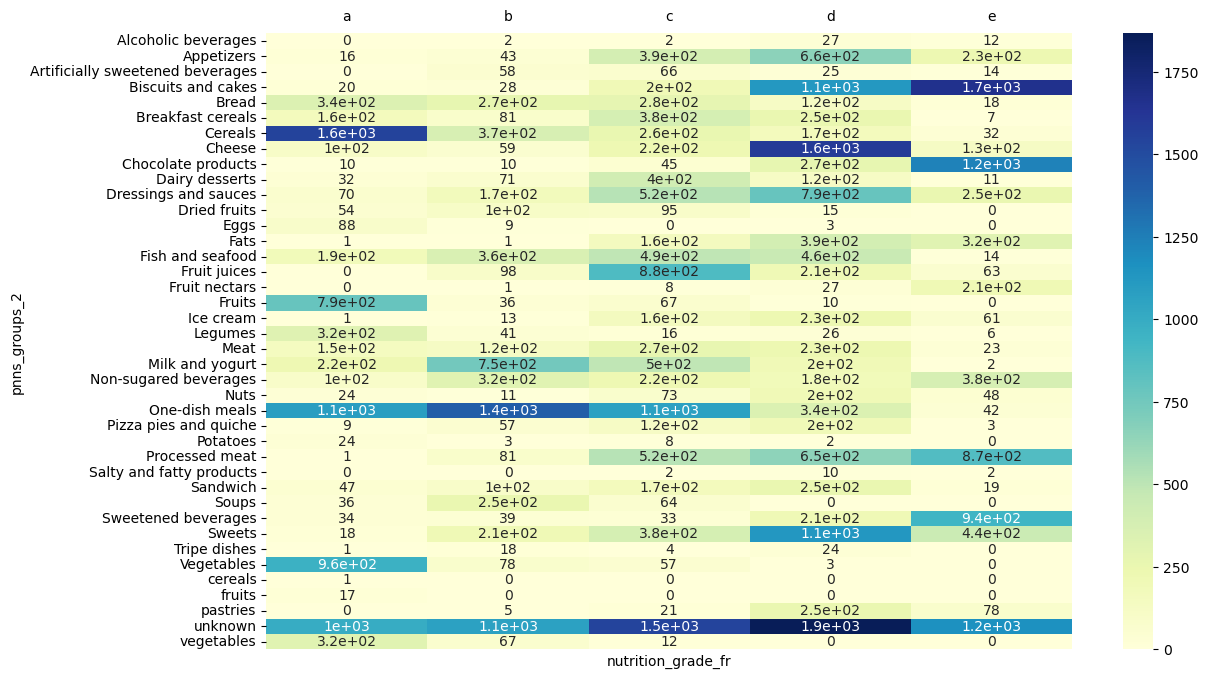

<IPython.core.display.Javascript object>

In [97]:
# tableau croisé entre catégorie de produit et nutriscores
heat = pd.crosstab(
    openfoodfacts2["pnns_groups_2"], openfoodfacts2["nutrition_grade_fr"]
)
plt.figure(figsize=(13, 8))
sns.heatmap(heat, cmap="YlGnBu", annot=True)
plt.tick_params(
    axis="both",
    which="major",
    labelsize=10,
    labelbottom=False,
    bottom=False,
    top=False,
    labeltop=True,
)

## 11.2 Imputation avec KNNImputer

Nous allons utiliser la méthode KNN ( k-nearest neighbors ) imputer afin de combler les valeurs numériques manquantes.

In [98]:
imputer = KNNImputer(n_neighbors=3, weights="uniform", metric="nan_euclidean")
imputer

KNNImputer(n_neighbors=3)

<IPython.core.display.Javascript object>

In [99]:
scaler = StandardScaler()
scaler.fit(openfoodfacts2[cols_num])

StandardScaler()

<IPython.core.display.Javascript object>

In [100]:
# Mise à l'échelle
scaled_numerics = scaler.transform(openfoodfacts2[cols_num])
scaled_numerics

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ..., -0.32819302,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

<IPython.core.display.Javascript object>

In [101]:
# Imputation des valeurs manquantes
scaled_numerics_imputed = imputer.fit_transform(scaled_numerics)

<IPython.core.display.Javascript object>

In [102]:
# inverse_transform pour revenir à l'échelle de depart
openfoodfacts2[cols_num] = scaler.inverse_transform(scaled_numerics_imputed)

<IPython.core.display.Javascript object>

Nous devons vérifier si l'imputation des colonnes numériques a bien été réalisé. Pour cela nous allons tracer un graphe avec le taux de complétion

In [118]:
def completion_rate(
    df, seuil
):  # fonction affichant le pourcentage de valeurs renseigné hors NaN
    nb_rows = df.shape[0]
    NaN_rate1 = df.notna().sum().sort_values() / nb_rows * 100
    NaN_rate1_sup_seuil = NaN_rate1[
        NaN_rate1 > seuil
    ]  # afficher les valeur à partir du seuil
    plt.figure(figsize=(20, 8))
    sns.barplot(x=NaN_rate1_sup_seuil.index, y=NaN_rate1_sup_seuil.values)
    plt.xticks(rotation=90)
    plt.ylabel("Niveau de données renseignées en % \n", fontsize=14)
    plt.title("Taux de complétion des colonnes \n", fontsize=16)
    plt.grid()
    plt.show()

<IPython.core.display.Javascript object>

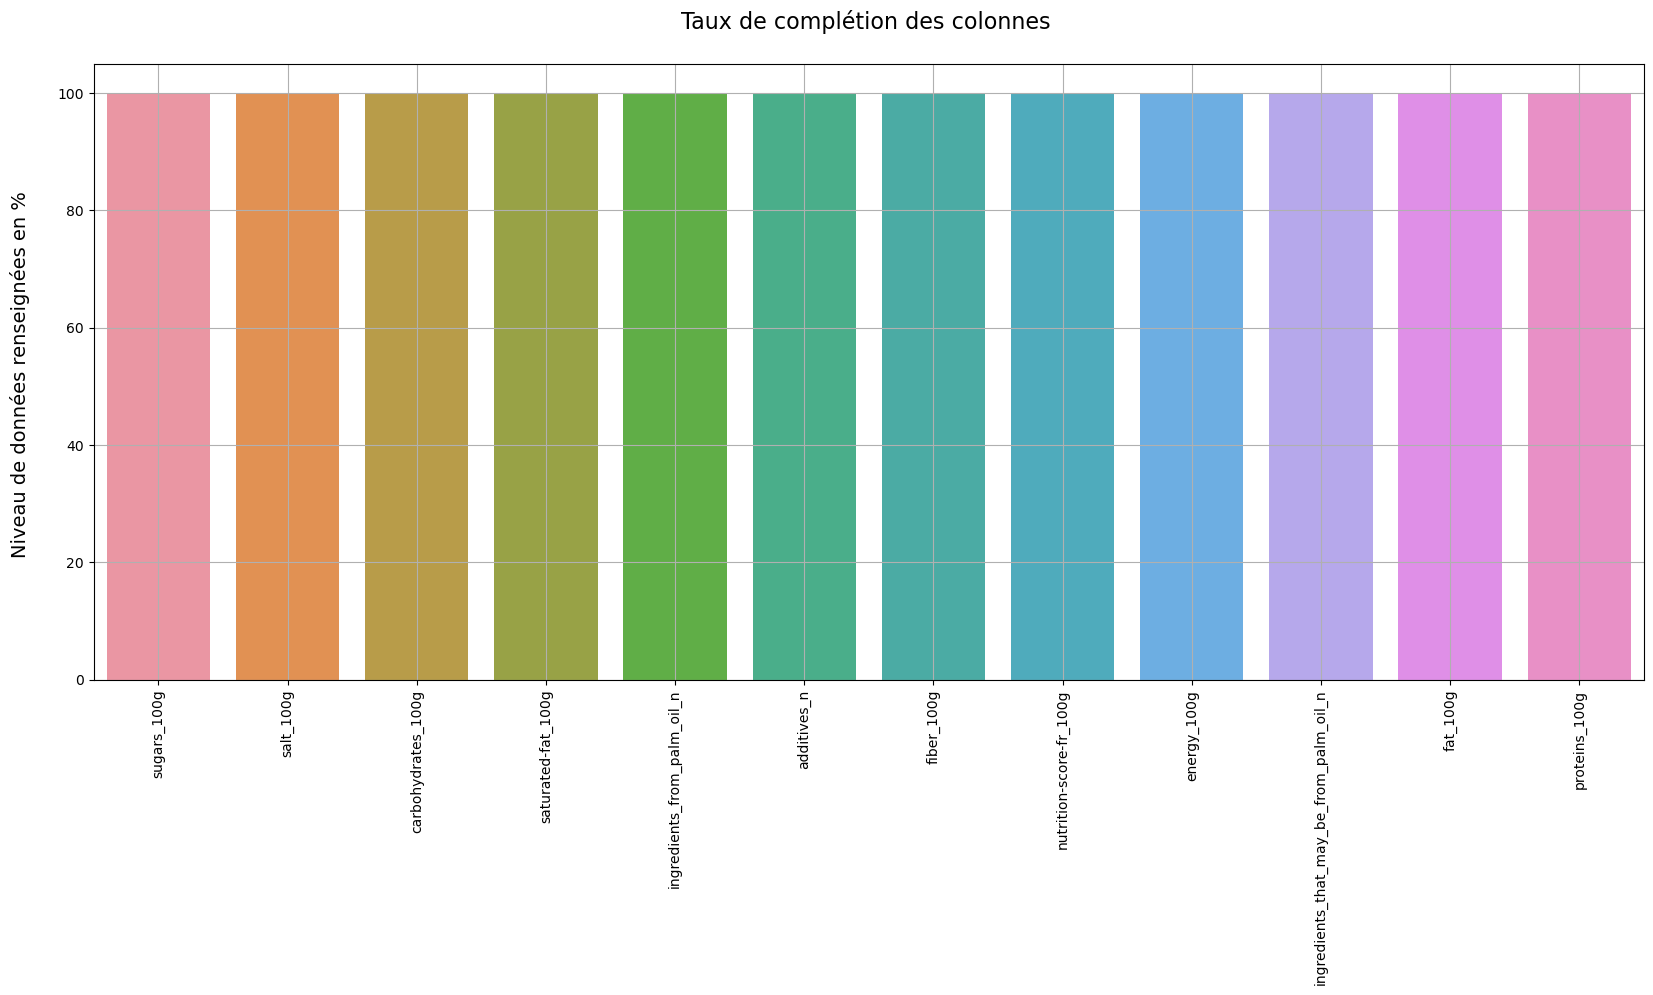

<IPython.core.display.Javascript object>

In [119]:
# Appel de la fonction sur df_data seuil=40
completion_rate(openfoodfacts2[cols_num], 40)

Notre dataframe est bien nettoyé, ainsi nous observons aucune valeur manquante pour nos colonnes numériques

# 12. DataFramme nettoyé

## 12.1 DataFrame

In [120]:
openfoodfacts2.to_csv(path + "openfoodfacts2.csv", index=False)

<IPython.core.display.Javascript object>

In [121]:
# Lecture du fichier csv sauvegardé
openfoodfacts_clean = pd.read_csv(path + "openfoodfacts2.csv")

<IPython.core.display.Javascript object>

In [122]:
openfoodfacts_clean.head()

,allergens,countries_fr,sugars_100g,salt_100g,nutrition_grade_fr,main_category_fr,labels,stores,emb_codes,quantity,...,image_small_url,energy_100g,categories_fr,labels_tags,categories,serving_size,ingredients_that_may_be_from_palm_oil_n,fat_100g,code,proteins_100g
0,NaN,France,12.939372,1.155451,NaN,NaN,NaN,NaN,NaN,1kg,...,NaN,1088.244668,NaN,NaN,NaN,NaN,0.148434,12.486568,3087,7.780502
1,NaN,France,12.939372,1.155451,NaN,Filet-de-boeuf,NaN,NaN,NaN,2.46 kg,...,http://fr.openfoodfacts.org/images/products/00...,1088.244668,Filet-de-boeuf,NaN,Filet de bœuf,NaN,0.148434,12.486568,24600,7.780502
2,NaN,France,12.939372,1.155451,NaN,NaN,NaN,NaN,NaN,NaN,...,http://fr.openfoodfacts.org/images/products/00...,1088.244668,NaN,NaN,NaN,NaN,0.148434,12.486568,39259,7.780502
3,NaN,France,27.466667,0.295453,NaN,Aliments et boissons à base de végétaux,AB,NaN,NaN,1 kg,...,http://fr.openfoodfacts.org/images/products/00...,1424.400000,"Aliments et boissons à base de végétaux,Alimen...","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Aliments et boissons à base de végétaux,Alimen...",NaN,0.000000,17.200000,5200016,7.733333
4,"Blé, Beurre, Oeufs, Noisette",France,39.400000,0.527333,NaN,Sablés,Point Vert,NaN,NaN,1 kg,...,http://fr.openfoodfacts.org/images/products/00...,603.666667,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",en:green-dot,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,1.000000,3.053333,7730009,4.996667


<IPython.core.display.Javascript object>

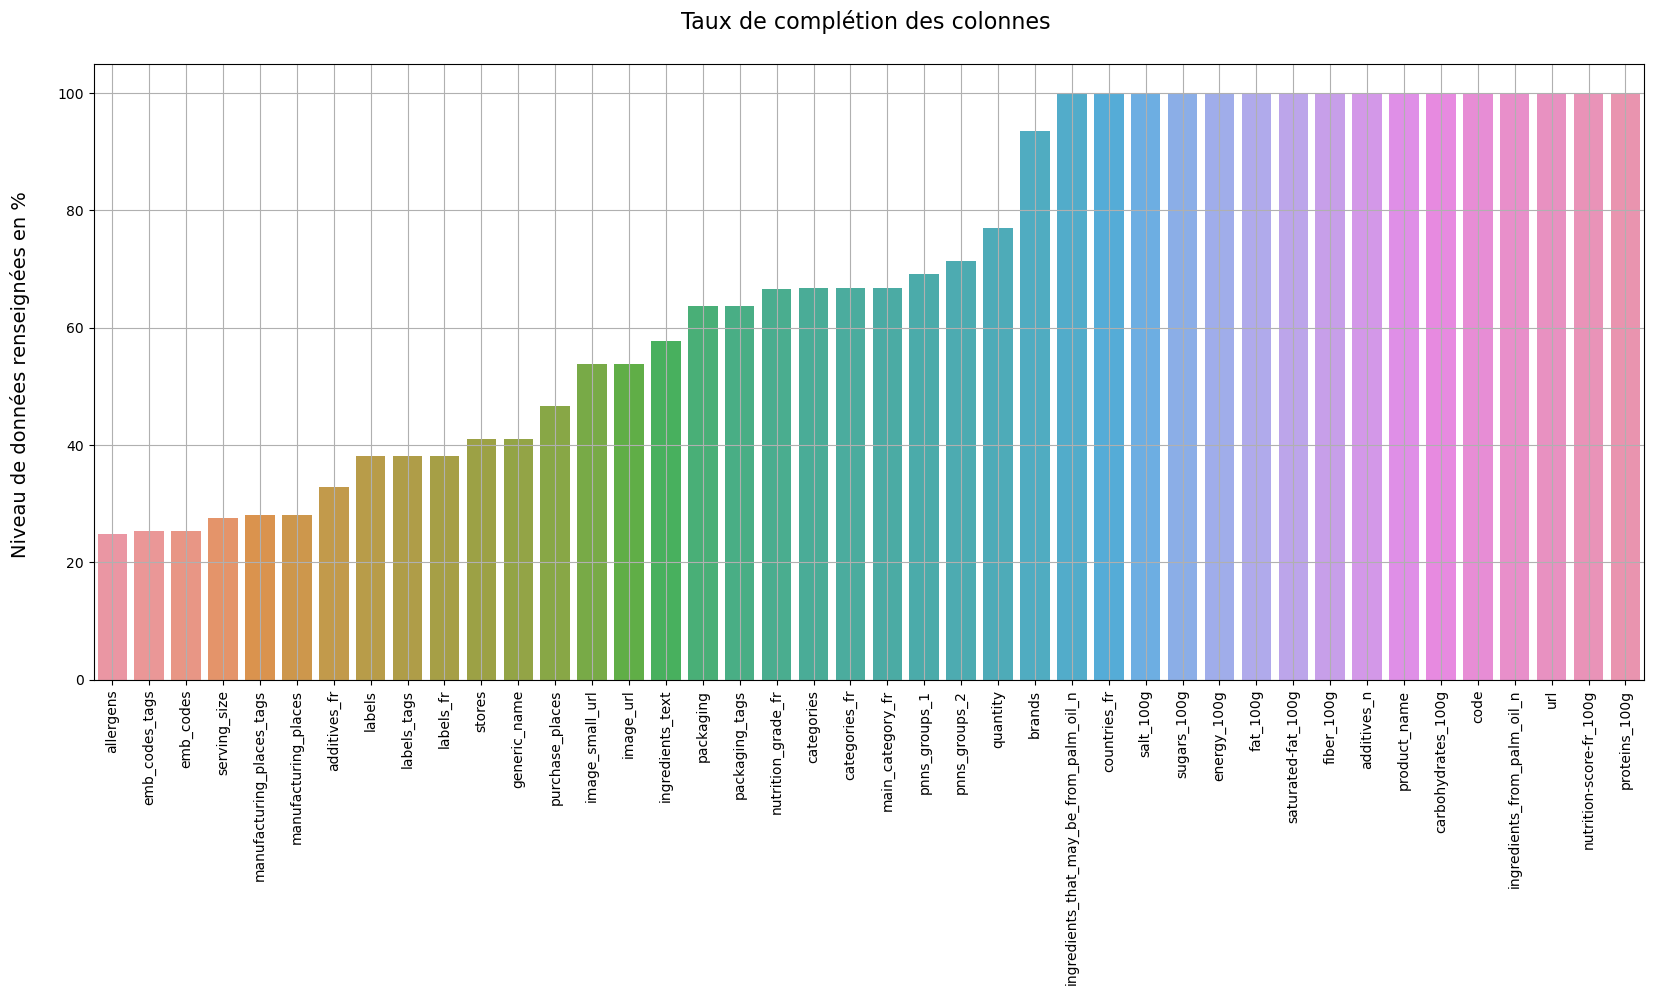

<IPython.core.display.Javascript object>

In [123]:
# Appel de la fonction sur df_data seuil=0
completion_rate(openfoodfacts_clean, 0)

## 12.2 Les colonnes numériques et catégoriques 

In [124]:
print(cols_num)
print(f"\n le nombre de colonnes numérique: est {len(cols_num)}")

Index(['sugars_100g', 'salt_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'ingredients_from_palm_oil_n', 'additives_n', 'fiber_100g',
       'nutrition-score-fr_100g', 'energy_100g',
       'ingredients_that_may_be_from_palm_oil_n', 'fat_100g', 'proteins_100g'],
      dtype='object')

 le nombre de colonnes numérique: est 12


<IPython.core.display.Javascript object>

In [125]:
print(categ_cols)
print(f"\n le nombre de colonnes catégoriques: est {len(categ_cols)}")

Index(['allergens', 'countries_fr', 'nutrition_grade_fr', 'main_category_fr',
       'labels', 'stores', 'emb_codes', 'quantity', 'pnns_groups_1',
       'manufacturing_places_tags', 'url', 'brands', 'pnns_groups_2',
       'ingredients_text', 'additives_fr', 'image_url', 'packaging_tags',
       'purchase_places', 'manufacturing_places', 'product_name', 'labels_fr',
       'packaging', 'generic_name', 'emb_codes_tags', 'image_small_url',
       'categories_fr', 'labels_tags', 'categories', 'serving_size', 'code'],
      dtype='object')

 le nombre de colonnes catégoriques: est 30


<IPython.core.display.Javascript object>

## 12.3 Conclusion 

Nous avons bien nettoyé et sauvegardé notre dataframe. Nous pouvons maintenant l'utiliser dans un autre notebook afin d'explorer notre data nettoyée.